# Digital Health Portfolio Analysis Scripts
## For any questions, please contact the corresponding author of the publication
==============================================================================================

### Files needed to be placed in the datapath folder specified below include:
- Grant portfolio downloaded from iSearch Grants Module: https://itools.od.nih.gov/isearch/grants/
    - filename labeled here as: DHT7-iSearch_-_Grants-export_2023-10-16-18-07-55
    - link to search: https://itools.od.nih.gov/isearch/grants/#search:searchId=653bc741b74a15305e34955c [NIH access only] (note, this will be an updated search and will likely have different N's.  To get the exact same data, you can request the excel spreadsheet or access to the iSearch Portfolio
- NIH Budgets per IC: https://report.nih.gov/funding/nih-budget-and-spending-data-past-fiscal-years/budget-and-spending
    - Grants, Contracts, and Other Mechanisms: Awards, average funding, and total funding by Institute/Center (~160KB)
    - filename 'T106 2023 RES GR_OTHER MECH and CNTRCTS_Num and Tot and Avg Fund by IC and Mech.xlsx'
- Excel of IC Names and Acronyms needed to translate between different dataframes here.  Ths is in the github folder.
    - filename: IC_Names.xlsx

### Search Terms: "decentralized trial",  "remote trial", "virtual trial", "digital health", "digital health technology", "digital health technologies", "mobile app", "mobile application", "mobile health", "mobile health technology", "mobile health technologies", mhealth, "smart connected health", "remote patient monitoring", "connected home health", "wearable device", wearable, accelerometer, accelerometry, actigraph, actigraphy, "remote healthcare delivery", "virtual care", "digital patient engagement", telehealth, telemedicine. 

In [1]:
datapath='C:\\Users\\radmantc\\Documents\\Digital Health Portfolio Analysis\\MasterData\\'#source data downloaded from iSearch

outpath='C:\\Users\\radmantc\\\OneDrive - National Institutes of Health\\\Digital Health Portfolio Analysis\\Outputs To Share\\'

import os
try:
    os.mkdir(outpath)
    #os.mkdir(outpath + '\\blah blah subfolder\\')
except OSError as error:
    print(error)  
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\2140948952.py:3: SyntaxWarning: invalid escape sequence '\O'
  outpath='C:\\Users\\radmantc\\\OneDrive - National Institutes of Health\\\Digital Health Portfolio Analysis\\Outputs To Share\\'


[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\radmantc\\\\OneDrive - National Institutes of Health\\\\Digital Health Portfolio Analysis\\Outputs To Share\\'


In [2]:
#load iSearch results
inputname='DHT7-iSearch_-_Grants-export_2023-10-16-18-07-55' 
dfi = pd.read_excel(datapath + inputname + '.xlsx') 

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
#make sure you have year range correct:
dfi['Fiscal Year']=dfi['Fiscal Year'].astype(int)
endyear=2023
dfi=dfi[dfi['Fiscal Year']<=endyear]
endyear=str(endyear) #needed to label plots later
print( np.sort(dfi['Fiscal Year'].unique()) ) 

[2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [4]:
#remove L mechanisms
dfi=dfi[~dfi["Activity Code"].str.get(0).isin(['L'])]
dfi = dfi.loc[dfi['Appl Type Code'].isin([1, 2, 5])]

In [5]:
print(list(dfi.columns))

['Title', 'Abstract', 'Specific Aims', 'Public Health Relevance', 'Condition', 'MeSH Extracted', 'Target', 'Chemicals & Drugs', 'RCDC Categories', 'Devices', 'Activity Code', 'Admin IC', 'Admin IC Long', 'Funding ICs', 'Agency', 'Appl Class Code', 'Appl Status Code', 'Appl Type Code', 'Active', 'Award Status', 'Appl ID', 'Parent Contract Appl ID', 'Parent Contract Number', 'Contract MOD Number', 'Contract Project Number', 'Contract Project Number Suffix', 'Grant Number', 'Full Grant Number', 'Serial Number', 'Suffix Code', 'Sub Project ID', 'Fiscal Year', 'Support Year', 'Parent RFA Notice', 'RFA Notice Title', 'RFA PA Number', 'Common Fund', 'Budget Start Date', 'Budget End Date', 'Project Period Start Date', 'Project Period End Date', 'Primary PCC', 'All PCC', 'All PCC Primary/Secondary', 'All PCC ICD', 'Main PCC', 'Main PCC Primary/Secondary', 'Main PCC ICD', 'Human Subjects Code', 'Animal Subjects Code', 'ARRA Flag', 'OPA RPG Only', 'RPG Only', 'Former Grant Number', 'Special Topic

In [6]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [7]:
#check activity codes:
np.sort(dfi['Activity Code'].unique())

array(['C06', 'D43', 'DP1', 'DP2', 'DP3', 'DP5', 'F30', 'F31', 'F32',
       'F99', 'G08', 'G12', 'G13', 'G20', 'K00', 'K01', 'K02', 'K07',
       'K08', 'K12', 'K18', 'K22', 'K23', 'K24', 'K25', 'K26', 'K43',
       'K76', 'K99', 'KL2', 'OT2', 'P01', 'P20', 'P2C', 'P30', 'P41',
       'P42', 'P50', 'R00', 'R01', 'R03', 'R13', 'R15', 'R16', 'R18',
       'R21', 'R24', 'R25', 'R33', 'R34', 'R35', 'R36', 'R37', 'R41',
       'R42', 'R43', 'R44', 'R56', 'R61', 'RC2', 'RF1', 'RM1', 'S10',
       'SB1', 'T15', 'T32', 'T35', 'TL1', 'U01', 'U10', 'U18', 'U19',
       'U24', 'U2C', 'U2R', 'U34', 'U41', 'U43', 'U44', 'U54', 'UE5',
       'UF1', 'UG1', 'UG3', 'UH2', 'UH3', 'UH4', 'UL1', 'UM1'],
      dtype=object)

## Supplemental Table 9: Total DHT and yearly funding prior to deduplication:### Columns: 
Total DHT Cost,s	$ change from previous F,Y	y-o-y % chang

(note: Supplemental Table 10 is created direct from iSearch Facets view)n:

In [8]:
#yearly funding per year for DHTs prior to dedup
fundsIC_all=pd.pivot_table(dfi,index=["Admin IC Long"],columns=["Fiscal Year"],values="Total Cost",aggfunc=np.sum)
print('Yearly DHT funding per year = ', fundsIC_all.sum(axis=0)) 

Yearly DHT funding per year =  Fiscal Year
2015    3.487256e+08
2016    3.661290e+08
2017    4.849827e+08
2018    6.185176e+08
2019    8.510038e+08
2020    9.085608e+08
2021    1.177283e+09
2022    1.340484e+09
2023    1.533281e+09
dtype: float64


C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\1063289999.py:2: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  fundsIC_all=pd.pivot_table(dfi,index=["Admin IC Long"],columns=["Fiscal Year"],values="Total Cost",aggfunc=np.sum)


# Figure 2.  Total Funding for DHT Grants by ICs Tier from FY2015 to FY 2023

## Fig. 2, step a) Read in total IC budgets from file to derive the 3 budget tiers:

In [9]:
#https://report.nih.gov/funding/nih-budget-and-spending-data-past-fiscal-years/budget-and-spending
#Grants, Contracts, and Other Mechanisms: Awards, average funding, and total funding by Institute/Center (~160KB)
budgets = pd.read_excel(datapath + 'T106 2023 RES GR_OTHER MECH and CNTRCTS_Num and Tot and Avg Fund by IC and Mech.xlsx', header=1) #note older versions of this database have more header lines 

budgets.rename(columns={'Institute/Center':'Acronym', 'Total Funding':'Budget'}, inplace=True) #needed to eventually do a join to grant data
print(np.unique(budgets.Acronym))  #note Total is in some rows

budgetsTmp=budgets.set_index(['Fiscal Year', 'Acronym'])

#budgetsTmp = budgetsTmp[ ~budgetsTmp.index.get_level_values(1).str.contains('TOTAL') ]
budgetsTmp = budgetsTmp[ (~budgetsTmp.index.get_level_values(1).str.contains('TOTAL') ) & (~budgetsTmp.index.get_level_values(1).str.contains('FY Total')) ]

budgetsTmp=budgetsTmp.iloc[:, 0].to_frame()
print(budgetsTmp)

['FIC' 'FY Total' 'NCATS' 'NCCAM**' 'NCCIH' 'NCI' 'NEI' 'NHGRI' 'NHLBI'
 'NIA' 'NIAAA' 'NIAID' 'NIAMS' 'NIBIB' 'NICHD' 'NIDA' 'NIDCD' 'NIDCR'
 'NIDDK' 'NIEHS' 'NIGMS' 'NIMH' 'NIMHD' 'NINDS' 'NINR' 'NLM' 'OD' 'OD '
 'ORS' 'ORWH' 'TOTAL']
                         Budget
Fiscal Year Acronym            
2014        FIC        68700283
            NCATS     526957260
            NCCAM**   103732556
            NCI      3501043439
            NEI       564640085
...                         ...
2023        NIMHD     467468005
            NINDS    2582049640
            NINR      163524421
            NLM        84624714
            OD       1389381330

[253 rows x 1 columns]


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [10]:
#note this dataframe has "TOTAL" and FY Total entries that have been removed in budgetsTmp dataframe
budgets[budgets.Acronym=='TOTAL']  #
budgets[budgets.Acronym=='FY Total']

Fiscal Year   Acronym       Budget  Research Grants - Total Number  \
27          2014  FY Total  23522203229                           42167   
54          2015  FY Total  23488164224                           42166   
80          2016  FY Total  25225846739                           43431   
106         2017  FY Total  26972060072                           44445   
132         2018  FY Total  28975943278                           46930   
158         2019  FY Total  31192343463                           49092   
184         2020  FY Total  31888383542                           50046   
210         2021  FY Total  33340390184                           50410   

      Research Grants - \nTotal Funding  \
27                          20986917504   
54                          21174344957   
80                          22649752290   
106                         24031670764   
132                         25906788735   
158                         28143252479   
184                         29256433921   
210                         30172387202   

     Research Grants  - \nAverage Funding   R&D Contracts - \nTotal Number  \
27                           497709.524130                            1142   
54                           502166.317815                            1003   
80                           521511.185328                            1231   
106                          540705.833367                            1234   
132                          552030.443959                            1316   
158                          573275.736963                            1188   
184                          584590.854834                             943   
210                          598539.718350                             930   

     R&D Contracts - \nTotal Funding   R&D Contracts - \nAverage Funding  \
27                         1691706935                       1.481355e+06   
54                         1497257096                       1.492779e+06   
80                         1684760524                       1.368611e+06   
106                        1958815068                       1.587370e+06   
132                        1863662206                       1.416157e+06   
158                        1726073825                       1.452924e+06   
184                        1127714222                       1.195879e+06   
210                        1016713978                       1.093241e+06   

     Fellowships - \nTotal Number  ...  Fellowships - \nAverage Funding  \
27                           3060  ...                     43771.649020   
54                           3172  ...                     43195.195776   
80                           3330  ...                     44255.776577   
106                          3511  ...                     45078.143549   
132                          3571  ...                     46069.942593   
158                          3732  ...                     46439.693998   
184                          3980  ...                     47594.987437   
210                          4224  ...                     48767.641098   

     Training Grants - \nTotal Number  Training Grants -\nTotal Funding  \
27                               1929                         598836973   
54                               1899                         623122581   
80                               1923                         656496704   
106                              1913                         663623617   
132                              1940                         691323660   
158                              1913                         688301270   
184                              1944                         716845013   
210                              1931                         722141870   

     Training Grants -\nAverage Funding  Construction Grants - Total Number   \
27                        310439.073613                                   16   
54                        328131.954186  

In [11]:
#calculate budget tiers:
budgetMean = pd.pivot_table(budgetsTmp, values='Budget', aggfunc="mean", index=['Acronym']) #
budgetMean.sort_values(by='Budget',inplace=True)
budgetMean['Budget Tier']='none'
budgetMean['Budget Tier'][budgetMean['Budget']<3.76e+08]='< 376M'
budgetMean['Budget Tier'][(budgetMean['Budget']>3.76e+08) & (budgetMean['Budget']<1.13e+09)]='376M to 1.13B'  #NIDA=11535629938 	
budgetMean['Budget Tier'][budgetMean['Budget']>1.13e+09]='> 1.13B'
budgetMean.columns=['budgetMean','Budget Tier']
budgetMean.index

C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\2949806020.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  budgetMean['Budget Tier'][budgetMean['Budget']<3.76e+08]='< 376M'
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\294980

Index(['ORS', 'ORWH', 'NLM', 'FIC', 'NCCAM**', 'NINR', 'NCCIH', 'NIMHD',
       'NIDCR', 'NIBIB', 'NIDCD', 'NIAAA', 'OD ', 'NHGRI', 'NIAMS', 'NIEHS',
       'NCATS', 'NEI', 'OD', 'NICHD', 'NIDA', 'NIMH', 'NIDDK', 'NINDS', 'NIA',
       'NIGMS', 'NHLBI', 'NIAID', 'NCI'],
      dtype='object', name='Acronym')

## Fig. 2, step b): read in codes of IC names to acronyms

In [12]:
IC = pd.read_excel(datapath + 'IC_Names.xlsx') #qvr database
IC.rename(columns={'Acronym':'Admin IC Long','Code': 'Admin IC Short'}, inplace=True)
#IC.rename(columns={'Code': 'Admin IC'}, inplace=True)
#IC.drop(['Admin IC'], axis=1,inplace=True)

print(IC,'\n========================================\n')

tmp=fundsIC_all.stack(0).reset_index(level=1)
tmp.rename(columns={0:'DHT$'}, inplace=True)
tmp=IC.join(tmp, on='Admin IC Long')
print(tmp)

   Admin IC Long Admin IC Short
0            FIC             TW
1          NCATS             TR
2          NCCIH             AT
3            NCI             CA
4            NEI             EY
5          NHGRI             HG
6          NHLBI             HL
7            NIA             AG
8          NIAAA             AA
9          NIAID             AI
10         NIAMS             AR
11         NIBIB             EB
12         NICHD             HD
13          NIDA             DA
14         NIDCD             DC
15         NIDCR             DE
16         NIDDK             DK
17         NIEHS             ES
18         NIGMS             GM
19          NIMH             MH
20         NIMHD             MD
21         NINDS             NS
22          NINR             NR
23           NLM             LM
24            OD             OD 

   Admin IC Long Admin IC Short  Fiscal Year        DHT$
0            FIC             TW         2015   2654483.0
0            FIC             TW         2016   29628

In [13]:
#join IC names to budgets and budget Means
tmp.rename(columns={'Admin IC Long':'Acronym'}, inplace=True)
tmp=tmp.set_index(['Acronym', 'Fiscal Year'])
df=tmp.join(budgetsTmp)
df=df.join(budgetMean,on='Acronym')
df.index.names = ['Admin IC','Fiscal Year']

In [14]:
print(df[df['Admin IC Short']=='TR'])

                     Admin IC Short        DHT$     Budget   budgetMean  \
Admin IC Fiscal Year                                                      
NCATS    2016                    TR  23321832.0  570085566  601007809.1   
         2017                    TR  30050160.0  578421698  601007809.1   
         2018                    TR  34238819.0  596068934  601007809.1   
         2019                    TR  33587784.0  638972236  601007809.1   
         2020                    TR  46162490.0  637599365  601007809.1   
         2021                    TR  52937239.0  648946868  601007809.1   
         2022                    TR  86045900.0  643154976  601007809.1   
         2023                    TR  82783068.0  645946539  601007809.1   

                        Budget Tier  
Admin IC Fiscal Year                 
NCATS    2016         376M to 1.13B  
         2017         376M to 1.13B  
         2018         376M to 1.13B  
         2019         376M to 1.13B  
         2020        

In [15]:
#% DHT funding out of all of NIH funding:
print('% DHT Funding out of NIH Budget = ',df['DHT$'].sum() / df.Budget.sum() * 100)
print('Total NIH Funding 2015 -',endyear,df.Budget.sum())

% DHT Funding out of NIH Budget =  2.800839618104574
Total NIH Funding 2015 - 2023 272381483384


## plot of total funds for 3 budget tiers

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Budget Tier
< 376M           1.343519e+07
376M to 1.13B    1.911842e+07
> 1.13B          6.011790e+07
dtype: float64
['−0.2', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4']
['$-250M', '$0M', '$20M', '$40M', '$60M', '$80M', '$100M', '$120M', '$140M']

==========FIGURE 2===========



C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\1879903174.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  [ax[i].set_yticklabels(labels) for i in range(2)]
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\1879903174.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  [ax[i].set_yticklabels(labels) for i in range(2)]


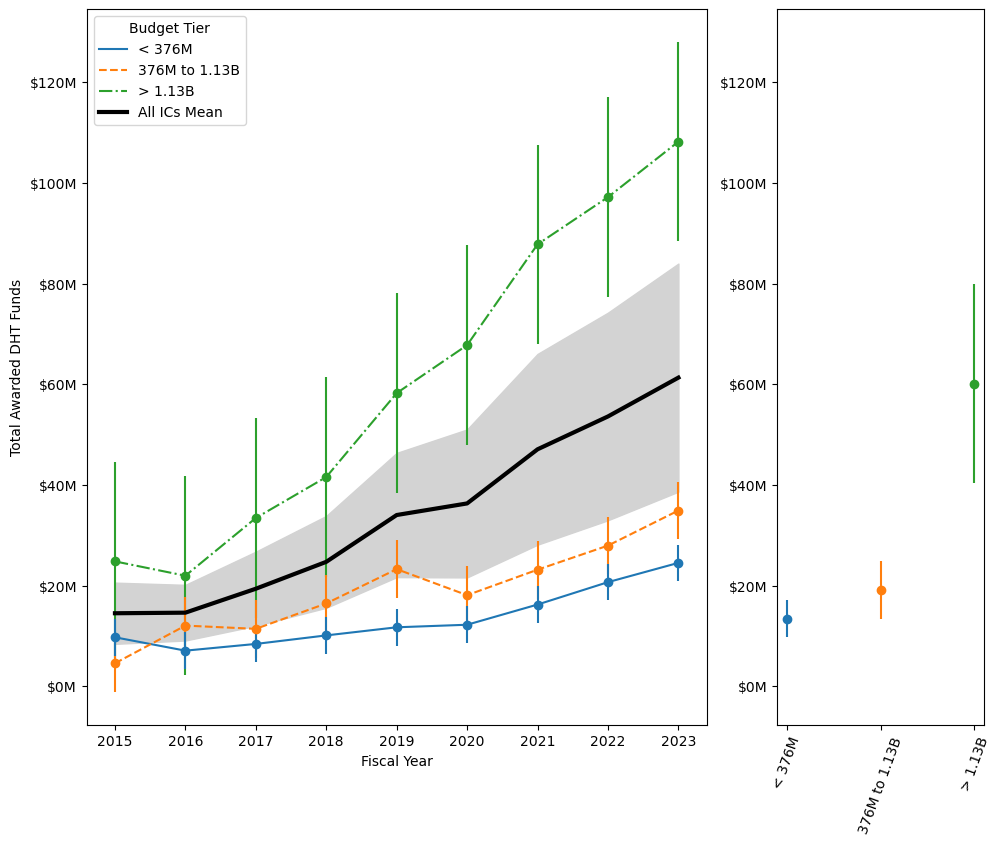

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [16]:
dfTmp=df.reset_index([0,1])
df_piv_m=pd.pivot_table(dfTmp, index=['Budget Tier'], columns='Fiscal Year', values='DHT$',aggfunc=['mean'])
df_piv_m.to_csv(outpath + 'Figure2_mHealthFundingByBudgetTier_sideplotAvgBar_totalGrants.csv') #output table to include in publication
#df_piv_m=pd.pivot_table(dfTmp, index=['Fiscal Year'], columns='Budget Tier', values='DHT$',aggfunc=['mean'])

df_piv_m.columns = df_piv_m.columns.get_level_values(1)
lst = ["< 376M", "376M to 1.13B", "> 1.13B"]
df_piv_m = df_piv_m.loc[lst]
df_piv_sd=pd.pivot_table(dfTmp, index=['Budget Tier'], columns='Fiscal Year', values='DHT$',aggfunc=['std'])
df_piv_sd.columns = df_piv_sd.columns.get_level_values(1)
df_piv_sd = df_piv_sd.loc[lst]

#main plot, lines of each tier:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10, 8))
fig.tight_layout(pad=2)
linestyle = ["-"]*1 + ["--"]*1 + ["-."]*1
fig=df_piv_m.T.plot(ax=ax[0] , style=linestyle, fontsize=10) #plot.area(...., stacked=False)#lw=linewidth

#conf. int. for tiers:
lines=fig.get_lines()# [0].get_color() 
colors = [line.get_color() for line in lines]
ci = 1.96 * np.std(df_piv_m.T['> 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['> 1.13B'],yerr=ci, fmt ='o', color=colors[2])
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['11.5B+']-ci), (df_piv_m.T['11.5B+']+ci), color=colors[0], alpha=.1)
ci = 1.96 * np.std(df_piv_m.T['376M to 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['3.6 to 11.5B']-ci), (df_piv_m.T['3.6 to 11.5B']+ci), color=colors[1], alpha=.1)
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['376M to 1.13B'],yerr=ci, fmt ='o', color=colors[1])
ci = 1.96 * np.std(df_piv_m.T['< 376M'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['less 3.6B']-ci), (df_piv_m.T['less 3.6B']+ci), color=colors[2], alpha=.1)
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['< 376M'],yerr=ci, fmt ='o', color=colors[0])

#grand mean plot and error:
df_mean=np.mean(fundsIC_all, axis=0)
ci = 1.96 * np.std(fundsIC_all)/np.sqrt(len(fundsIC_all.index))
ax[0].plot(df_mean.T,linewidth=3, color='k',linestyle='-')
ax[0].fill_between(df_mean.index, (df_mean-ci), (df_mean+ci), color='lightgray', alpha=1) #, color='k', alpha=.1)

#nicify left plot
ylims=ax[0].get_ylim()
fig.set_ylabel('Total Awarded DHT Funds')
leg = fig.legend(loc="upper left")
legendText=list(df_piv_m.index)
legendText.append('All ICs Mean')
leg = fig.legend(legendText,loc="upper left", title="Budget Tier")#, loc=0, frameon=True)
#leg.set_title(")

##sideplot with IC means
#vals=fundsSubset.loc[list(fundsSubset.index)[:], list(fundsSubset.columns)].mean(axis=1)
vals = df_piv_m.mean(axis=1)
print(vals)
barerr=1.96*np.std(df_piv_m,axis=1)/np.sqrt(len(list(df_piv_m.columns)))
x=list(df_piv_m.index)[:]
marks=vals
for pos, y, err, ccolor in zip(x, marks,
                               barerr, colors):
    plt.errorbar(x=pos,y=y,yerr=err, fmt ='o', color=ccolor)
ax[1].set_ylim(ylims)
plt.xticks(rotation=70)

#change ytick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax[1].get_yticklabels()]
print(labels)
labels = ['$' + str(round(float(item)*100)) + 'M' for item in labels[1:]]
labels.insert(0,'$-250M')
print(labels)
[ax[i].set_yticklabels(labels) for i in range(2)]

print('\n==========FIGURE 2===========\n')
plt.show()
fig.figure.savefig(outpath + 'Figure2_mHealthFundingByBudgetTier_sideplotAvgBar_totalGrants.tiff', dpi=600,bbox_inches='tight') #
#fig.set_rasterized(True) #needed to so gray-shading is not interpreted as black when viewing .eps 
fig.figure.savefig(outpath + 'Figure2_mHealthFundingByBudgetTier_sideplotAvgBar_totalGrants.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


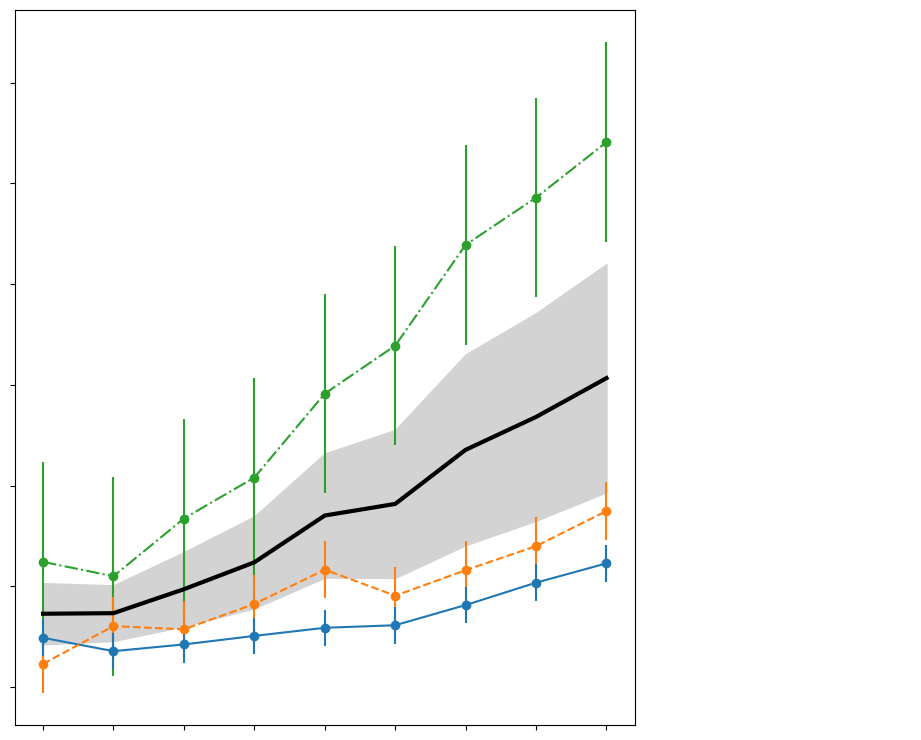

In [17]:
#plot figure without text and as individual panels for journal publication
#main plot, lines of each tier:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10, 8))
fig.tight_layout(pad=2)
linestyle = ["-"]*1 + ["--"]*1 + ["-."]*1
fig=df_piv_m.T.plot(ax=ax[0] , style=linestyle, fontsize=10, legend=None, xlabel=None) 

#conf. int. for tiers:
lines=fig.get_lines()# [0].get_color() 
colors = [line.get_color() for line in lines]
ci = 1.96 * np.std(df_piv_m.T['> 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['> 1.13B'],yerr=ci, fmt ='o', color=colors[2])
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['11.5B+']-ci), (df_piv_m.T['11.5B+']+ci), color=colors[0], alpha=.1)
ci = 1.96 * np.std(df_piv_m.T['376M to 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['3.6 to 11.5B']-ci), (df_piv_m.T['3.6 to 11.5B']+ci), color=colors[1], alpha=.1)
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['376M to 1.13B'],yerr=ci, fmt ='o', color=colors[1])
ci = 1.96 * np.std(df_piv_m.T['< 376M'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['less 3.6B']-ci), (df_piv_m.T['less 3.6B']+ci), color=colors[2], alpha=.1)
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['< 376M'],yerr=ci, fmt ='o', color=colors[0])

#grand mean plot and error:
df_mean=np.mean(fundsIC_all, axis=0)
ci = 1.96 * np.std(fundsIC_all)/np.sqrt(len(fundsIC_all.index))
ax[0].plot(df_mean.T,linewidth=3, color='k',linestyle='-')
ax[0].fill_between(df_mean.index, (df_mean-ci), (df_mean+ci), color='lightgray', alpha=1) #, color='k', alpha=.1)

#remove extra text
ax[0].axes.get_yaxis().set_ticklabels([]) #.set_ticks([]) #.set_visible(False)
ax[0].axes.get_xaxis().set_ticklabels([])
ax[0].axes.get_xaxis().get_label().set_visible(False)

ax[1].axis('off')
fig.figure.savefig(outpath + 'Figure2a_noText_mHealthFundingByBudgetTier_sideplotAvgBar_totalGrants.eps', dpi=600,bbox_inches='tight')

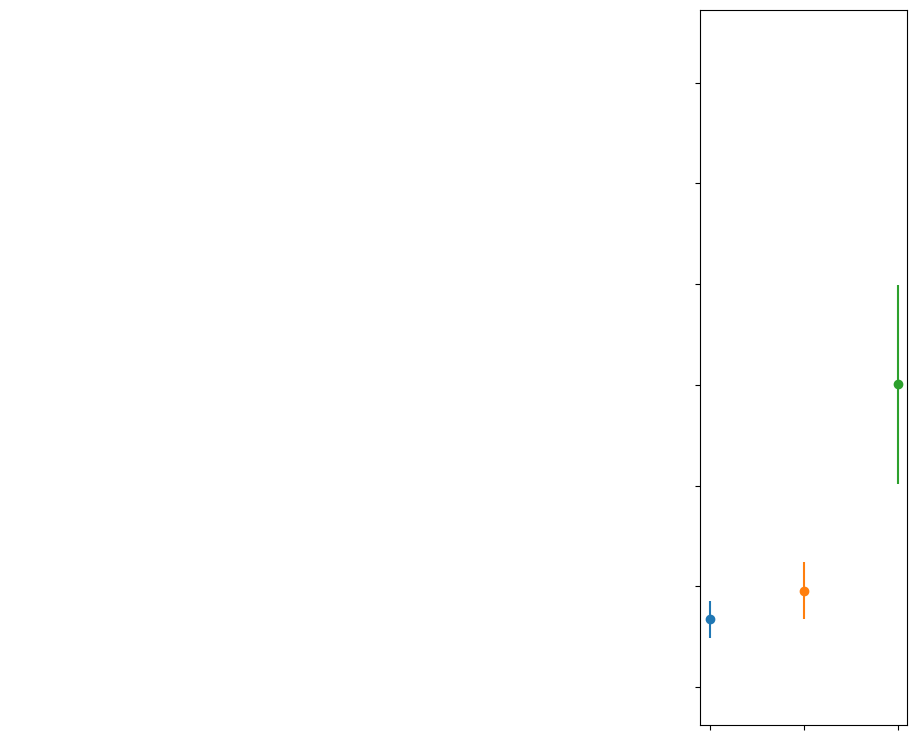

In [18]:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10, 8))
fig.tight_layout(pad=2)
ax[0].axis('off')

for pos, y, err, ccolor in zip(x, marks,
                               barerr, colors):
    plt.errorbar(x=pos,y=y,yerr=err, fmt ='o', color=ccolor)
ax[1].set_ylim(ylims)
plt.xticks(rotation=70)

#remove extra text
ax[1].axes.get_yaxis().set_ticklabels([]) #.set_ticks([]) #.set_visible(False)
ax[1].axes.get_xaxis().set_ticklabels([])
fig.figure.savefig(outpath + 'Figure2b_noText_mHealthFundingByBudgetTier_sideplotAvgBar_totalGrants.eps', dpi=600,bbox_inches='tight')

# Figure 3. Total Funding for DHT Grants as a Percentage of Total IC Budget according to ICs Tier from FY2015 to FY 2023

In [19]:
#convert percentage
df['percentBudg']=(df['DHT$']/df.Budget)*100
print(df)
#output spreadsheet
df.to_csv(outpath + 'mHealthFundingByIC_percentOverall_totalGrants.csv')

                     Admin IC Short        DHT$      Budget    budgetMean  \
Admin IC Fiscal Year                                                        
FIC      2015                    TW   2654483.0    77474918  8.243364e+07   
         2016                    TW   2962868.0    68595980  8.243364e+07   
         2017                    TW   4998502.0    71382502  8.243364e+07   
         2018                    TW   4951704.0    80666953  8.243364e+07   
         2019                    TW   5532612.0    81922565  8.243364e+07   
...                             ...         ...         ...           ...   
OD       2019                    OD  55822382.0  1004091774  9.355206e+08   
         2020                    OD  27649222.0  1132605378  9.355206e+08   
         2021                    OD  47991189.0  1174679362  9.355206e+08   
         2022                    OD  34572151.0  1248671608  9.355206e+08   
         2023                    OD  91266360.0  1389381330  9.355206e+08   

In [20]:
df[df['Admin IC Short']=='TR'].sum()
389127292.0/4959196182

0.07846579923826857

25
totals mean ci =  Fiscal Year
2015    6.081517e+06
2016    5.528015e+06
2017    7.363043e+06
2018    9.119560e+06
2019    1.233549e+07
2020    1.469713e+07
2021    1.894486e+07
2022    2.061655e+07
2023    2.265310e+07
dtype: float64
legendText =  ['< 376M', '376M to 1.13B', '> 1.13B', 'All ICs %DHT Mean', 'NIH Total (right-axis)']


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


['−1.0', '−0.5', '0.0', '0.5', '1.0', '1.5', '2.0']
2 − 0.0
3 − 0.5
4 − 1.0
5 − 1.5
6 − 2.0
['', '', '$0M', '$500M', '$1.0B', '$1.5B', '$2.0B']
Budget Tier
< 376M           7.225671
376M to 1.13B    3.175505
> 1.13B          2.858791
dtype: float64
9

==========FIGURE 3===========



C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\3986335078.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(labels)


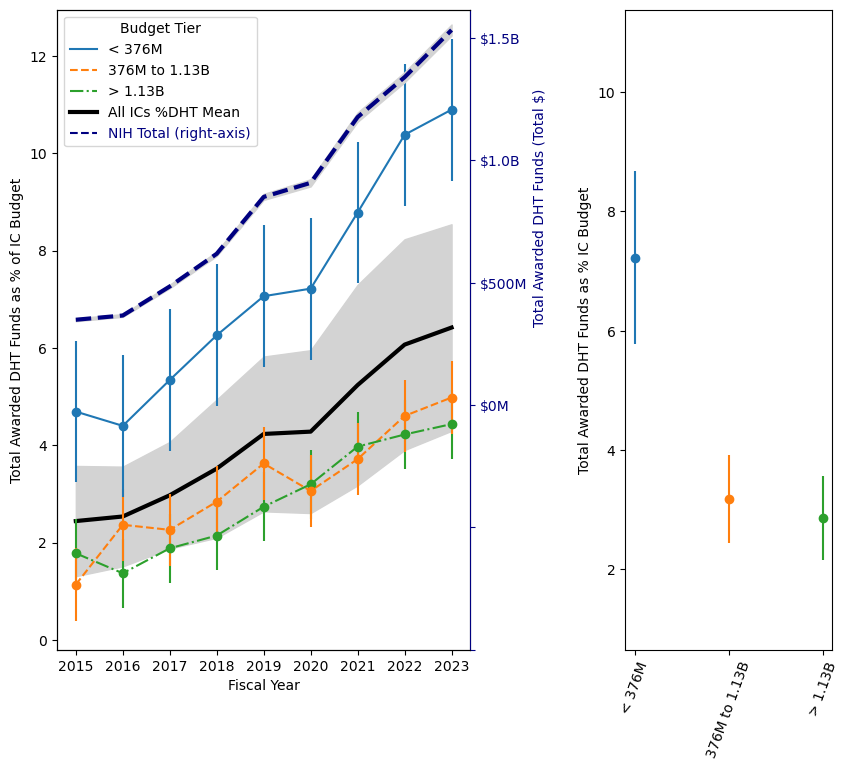

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [21]:
#percent tiers plot, with 2nd axis with nih total spending:
df=df.reset_index([0,1])

df_piv_m=pd.pivot_table(df, index=['Budget Tier'], columns='Fiscal Year', values='percentBudg',aggfunc=['mean'])
df_piv_m.columns = df_piv_m.columns.get_level_values(1)
lst = ["< 376M", "376M to 1.13B", "> 1.13B"]
df_piv_m = df_piv_m.loc[lst]
df_piv_sd=pd.pivot_table(df, index=['Budget Tier'], columns='Fiscal Year', values='percentBudg',aggfunc=['std'])
df_piv_sd.columns = df_piv_sd.columns.get_level_values(1)
df_piv_sd = df_piv_sd.loc[lst]

#redo above percent tiers plot, but add 2nd axis with nih total spending:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 3]}, figsize=(10, 8))
fig.tight_layout() #pad=2.5)

# set the spacing between subplots
plt.subplots_adjust(left = 0.125,  # the left side of the subplots of the figure
    right = 0.9,   # the right side of the subplots of the figure
    bottom = 0.1,  # the bottom of the subplots of the figure
    top = 0.9,     # the top of the subplots of the figure
    wspace = .5,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2,  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
)
ax2 = ax[0].twinx()


#main plot, lines of each tier:
linestyle = ["-"]*1 + ["--"]*1 + ["-."]*1
fig=df_piv_m.T.plot(ax=ax[0] , style=linestyle, fontsize=10) 

#conf. int. for tiers:
lines=fig.get_lines()# [0].get_color() 
colors = [line.get_color() for line in lines]

#grand mean plot and error:
df_pivot=pd.pivot(df, index='Admin IC', columns='Fiscal Year', values='percentBudg')

df_percmean=np.mean(df_pivot, axis=0)
print(len(fundsIC_all.index))
ax[0].plot(df_percmean,linewidth=3, color='k',linestyle='-')
#leg = fig.legend(loc="upper left")
#leg.set_title("Budget Tier")
#legendText=list(df_piv_m.index)
#legendText.append('All ICs Mean')
#fig.legend(legendText, loc='lower left', frameon=True,bbox_to_anchor=(.1, .85))
#leg2=fig.legend(legendText, loc='lower left',bbox_to_anchor=(.92, .5)) #1.0, 0.5))

#nicify left plot
ylims=ax[0].get_ylim()
fig.set_ylabel('Total Awarded DHT Funds as % of IC Budget')

#2nd axis with NIH total spending (not %):
df_total_all=pd.pivot(df, index='Admin IC', columns='Fiscal Year', values='DHT$')
totals=df_total_all.sum(axis=0)
ax2.plot(totals.index,totals,linewidth=3, color='navy',linestyle='--')
ax[0].plot(np.NaN, np.NaN, color='navy',linestyle='--', label='') #this is needed so there is an extra index in the legend
ci = 1.96 * np.std(df_total_all)/np.sqrt(len(df_total_all.index))
print('totals mean ci = ',ci)
ax2.fill_between(totals.index, (totals-ci), (totals+ci), color='lightgray', alpha=1) #color='k', alpha=.1)
ax2.set_ylim(bottom=-1000000000, top=ax2.get_ylim()[1])

#leg = fig.legend(frameon=False)#loc="upper left")
#leg.remove()
#fig.legend(loc='center left',bbox_to_anchor=(1.0, 0.5)).get_figure()
legendText=list(lst)
legendText.append('All ICs %DHT Mean'); 
#legendText.append(''); 
legendText.append('NIH Total (right-axis)');
print('legendText = ',legendText)
#fig.legend(legendText, loc=4,frameon=True)
leg2 = fig.legend(legendText,loc="upper left", title="Budget Tier")#, loc=0, frameon=True)
#leg2=fig.legend(legendText, loc='lower left',bbox_to_anchor=(1.92, .5), title="Budget Tier") #1.0, 0.5))
leg2.get_figure()
#spaces added below to center text on 2nd axis:
ax2.set_ylabel('                                                        ' +
             'Total Awarded DHT Funds (Total $)')
#change last item text color:
texts = leg2.get_texts()
texts[-1].set_color("navy")

#left plot, percent mean errorbars (has to be after legend to preserve order of lines):
ci = 1.96 * np.std(df_pivot)/np.sqrt(len(fundsIC_all.index))
ax[0].fill_between(df_percmean.index, (df_percmean-ci), (df_percmean+ci), color='lightgray', alpha=1) #, color='k', alpha=.1)
ci = 1.96 * np.std(df_piv_m.T['> 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['> 1.13B'],yerr=ci, fmt ='o', color=colors[2])
ci = 1.96 * np.std(df_piv_m.T['376M to 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['376M to 1.13B'],yerr=ci, fmt ='o', color=colors[1])


#change 2nd ytick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax2.get_yticklabels()]
print(labels)
for i,clab in enumerate(labels):
    if clab[0]!='\N{MINUS SIGN}':
        print(i,'\N{MINUS SIGN}',clab)
        labels[i]=float(clab)
        if labels[i]>=1.0:
            #labels[i]='$' + str(round(labels[i])) + 'B'
            labels[i]='$' + str((labels[i])) + 'B'

        else:
            labels[i]='$' + str(round(labels[i]*1000)) + 'M'
    else:
        labels[i]='' 
print(labels)
ax2.set_yticklabels(labels)
ax2.spines['right'].set_color('navy')
ax2.tick_params(axis='y', colors='navy')
ax2.yaxis.label.set_color('navy')
ci = 1.96 * np.std(df_piv_m.T['< 376M'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['< 376M'],yerr=ci, fmt ='o', color=colors[0])


##sideplot with IC means
#vals=fundsSubset.loc[list(fundsSubset.index)[:], list(fundsSubset.columns)].mean(axis=1)
vals = df_piv_m.mean(axis=1)
print(vals)
print(len(list(df_piv_m.columns)))
barerr=1.96*np.std(df_piv_m,axis=1)/np.sqrt(len(list(df_piv_m.columns)))
x=list(df_piv_m.index)[:]
marks=vals
for pos, y, err, ccolor in zip(x, marks,
                               barerr, colors):
    ax[1].errorbar(x=pos,y=y,yerr=err, fmt ='o', color=ccolor)
ax[1].set_ylim(ylims)
ax[1].tick_params(axis='x', rotation=70)
ax[1].set_ylabel('Total Awarded DHT Funds as % IC Budget')

print('\n==========FIGURE 3===========\n')

plt.show()
fig.figure.savefig(outpath + 'Figure3_mHealthFundingByBudgetTier_percent_sideplotAvgBar_wNIHtotals_totalGrants.tiff', dpi=600,bbox_inches='tight') #
#fig.set_rasterized(True) #needed to so gray-shading transparency is not interpreted as black when viewing .eps, removed transparency because 2nd axis did not rasterize 
fig.figure.savefig(outpath + 'Figure3_mHealthFundingByBudgetTier_percent_sideplotAvgBar_wNIHtotals_totalGrants.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\147571691.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(labels)


['−1.0', '−0.5', '0.0', '0.5', '1.0', '1.5', '2.0']
2 − 0.0
3 − 0.5
4 − 1.0
5 − 1.5
6 − 2.0
['', '', '$0M', '$500M', '$1.0B', '$1.5B', '$2.0B']


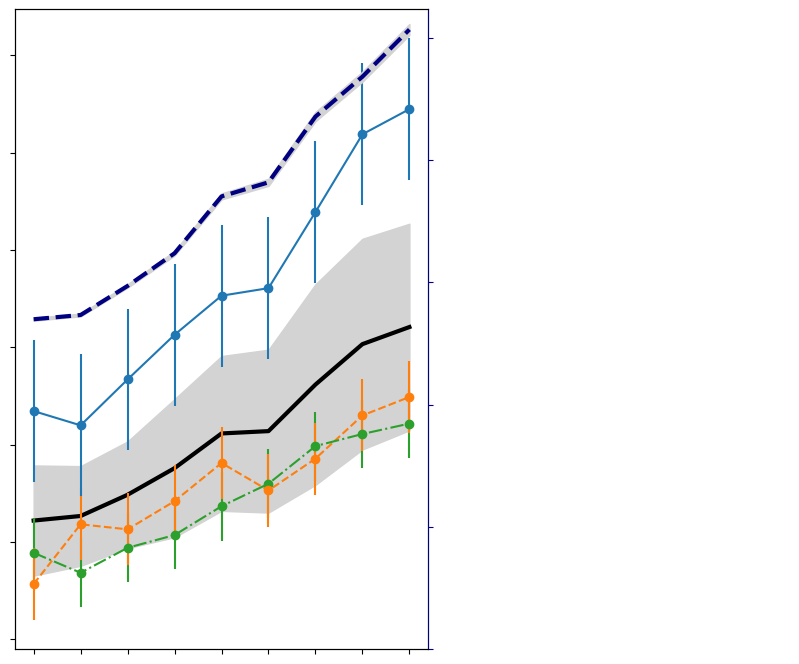

In [22]:
#plot figure without text and as individual panels for journal publication
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 3]}, figsize=(10, 8))
fig.tight_layout() #pad=2.5)

# set the spacing between subplots
plt.subplots_adjust(left = 0.125,  # the left side of the subplots of the figure
    right = 0.9,   # the right side of the subplots of the figure
    bottom = 0.1,  # the bottom of the subplots of the figure
    top = 0.9,     # the top of the subplots of the figure
    wspace = .5,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2,  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
)
ax2 = ax[0].twinx()


#main plot, lines of each tier:
linestyle = ["-"]*1 + ["--"]*1 + ["-."]*1
fig=df_piv_m.T.plot(ax=ax[0] , style=linestyle, fontsize=10, legend=None) 

#conf. int. for tiers:
lines=fig.get_lines()# [0].get_color() 
colors = [line.get_color() for line in lines]

#grand mean plot and error:
df_pivot=pd.pivot(df, index='Admin IC', columns='Fiscal Year', values='percentBudg')

df_percmean=np.mean(df_pivot, axis=0)
ax[0].plot(df_percmean,linewidth=3, color='k',linestyle='-')

#2nd axis with NIH total spending (not %):
df_total_all=pd.pivot(df, index='Admin IC', columns='Fiscal Year', values='DHT$')
totals=df_total_all.sum(axis=0)
ax2.plot(totals.index,totals,linewidth=3, color='navy',linestyle='--')
ax[0].plot(np.NaN, np.NaN, color='navy',linestyle='--', label='') #this is needed so there is an extra index in the legend
ci = 1.96 * np.std(df_total_all)/np.sqrt(len(df_total_all.index))
ax2.fill_between(totals.index, (totals-ci), (totals+ci), color='lightgray', alpha=1) #color='k', alpha=.1)
ax2.set_ylim(bottom=-1000000000, top=ax2.get_ylim()[1])

#left plot, percent mean errorbars (has to be after legend to preserve order of lines):
ci = 1.96 * np.std(df_pivot)/np.sqrt(len(fundsIC_all.index))
ax[0].fill_between(df_percmean.index, (df_percmean-ci), (df_percmean+ci), color='lightgray', alpha=1) #, color='k', alpha=.1)
ci = 1.96 * np.std(df_piv_m.T['> 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['> 1.13B'],yerr=ci, fmt ='o', color=colors[2])
ci = 1.96 * np.std(df_piv_m.T['376M to 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['376M to 1.13B'],yerr=ci, fmt ='o', color=colors[1])


#change 2nd ytick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax2.get_yticklabels()]
print(labels)
for i,clab in enumerate(labels):
    if clab[0]!='\N{MINUS SIGN}':
        print(i,'\N{MINUS SIGN}',clab)
        labels[i]=float(clab)
        if labels[i]>=1.0:
            #labels[i]='$' + str(round(labels[i])) + 'B'
            labels[i]='$' + str((labels[i])) + 'B'

        else:
            labels[i]='$' + str(round(labels[i]*1000)) + 'M'
    else:
        labels[i]='' 
print(labels)
ax2.set_yticklabels(labels)
ax2.spines['right'].set_color('navy')
ax2.tick_params(axis='y', colors='navy')
ax2.yaxis.label.set_color('navy')
ci = 1.96 * np.std(df_piv_m.T['< 376M'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['< 376M'],yerr=ci, fmt ='o', color=colors[0])


#remove extra text
ax[0].axes.get_yaxis().set_ticklabels([]) #.set_ticks([]) #.set_visible(False)
ax[0].axes.get_xaxis().set_ticklabels([])
ax[0].axes.get_xaxis().get_label().set_visible(False)
ax2.axes.get_yaxis().set_ticklabels([])

ax[1].axis('off')

fig.figure.savefig(outpath + 'Figure3a_noText_mHealthFundingByBudgetTier_percent_sideplotAvgBar_wNIHtotals_totalGrants.tiff', dpi=600,bbox_inches='tight') #
#fig.set_rasterized(True) #needed to so gray-shading transparency is not interpreted as black when viewing .eps, removed transparency because 2nd axis did not rasterize 
fig.figure.savefig(outpath + 'Figure3a_noText_mHealthFundingByBudgetTier_percent_sideplotAvgBar_wNIHtotals_totalGrants.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

Budget Tier
< 376M           7.225671
376M to 1.13B    3.175505
> 1.13B          2.858791
dtype: float64
9


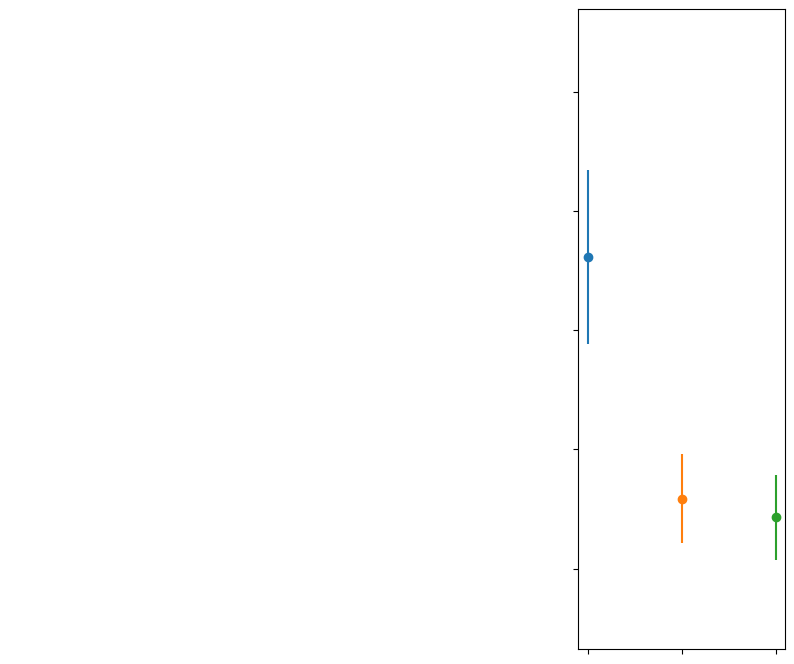

In [23]:
#plot figure without text and as individual panels for journal publication
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 3]}, figsize=(10, 8))
fig.tight_layout() #pad=2.5)

# set the spacing between subplots
plt.subplots_adjust(left = 0.125,  # the left side of the subplots of the figure
    right = 0.9,   # the right side of the subplots of the figure
    bottom = 0.1,  # the bottom of the subplots of the figure
    top = 0.9,     # the top of the subplots of the figure
    wspace = .5,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2,  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
)

##sideplot with IC means
#vals=fundsSubset.loc[list(fundsSubset.index)[:], list(fundsSubset.columns)].mean(axis=1)
vals = df_piv_m.mean(axis=1)
print(vals)
print(len(list(df_piv_m.columns)))
barerr=1.96*np.std(df_piv_m,axis=1)/np.sqrt(len(list(df_piv_m.columns)))
x=list(df_piv_m.index)[:]
marks=vals
for pos, y, err, ccolor in zip(x, marks,
                               barerr, colors):
    ax[1].errorbar(x=pos,y=y,yerr=err, fmt ='o', color=ccolor)
ax[1].set_ylim(ylims)

#remove extra text
ax[1].axes.get_yaxis().set_ticklabels([]) #.set_ticks([]) #.set_visible(False)
ax[1].axes.get_xaxis().set_ticklabels([])
ax[1].axes.get_xaxis().get_label().set_visible(False)

ax[0].axis('off')

fig.figure.savefig(outpath + 'Figure3b_noText_mHealthFundingByBudgetTier_percent_sideplotAvgBar_wNIHtotals_totalGrants.eps', dpi=600,bbox_inches='tight') #Format required: https://jamanetwork.com/journals/jamanetworkopen/pages/instructions-for-authors#SecTableofFigureRequirements

# Supplemental Figure 1a and b. Overall DHT awards distribution by grant type from 2015-2023 (pie chart and bar chart)

In [24]:
#mean of mhealth funding by IC/Year and grant Mechanism through pivot table
mechYrByIC=pd.pivot_table(dfi,index=["Admin IC", "Fiscal Year"],columns=["Activity Code"],values="Total Cost",aggfunc=np.sum)
mechYrByIC.to_csv(outpath + 'mHealthFundingByMechYearIC.csv')

mechYrByIC.xs('TR') #.index['Admin IC']
#mechYrByIC.iloc[df.columns.get_level_values('Admin IC') == 'TR']

C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\3343392942.py:2: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mechYrByIC=pd.pivot_table(dfi,index=["Admin IC", "Fiscal Year"],columns=["Activity Code"],values="Total Cost",aggfunc=np.sum)


Activity Code  C06  D43  DP1  DP2  DP3  DP5  F30  F31  F32  F99  ...  \
Fiscal Year                                                      ...   
2016           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2017           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2018           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2019           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2020           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2021           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2023           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

Activity Code        U54  UE5  UF1  UG1       UG3  UH2       UH3  UH4  \
Fiscal Year                                                             
2016                 NaN  NaN  NaN  NaN       NaN  NaN       NaN  NaN   
2017           3497558.0  NaN  NaN  NaN       NaN  NaN       NaN  NaN   
2018                 NaN  NaN  NaN  NaN       NaN  NaN       NaN  NaN   
2019                 NaN  NaN  NaN  NaN       NaN  NaN       NaN  NaN   
2020                 NaN  NaN  NaN  NaN  825123.0  NaN       NaN  NaN   
2021                 NaN  NaN  NaN  NaN  800773.0  NaN       NaN  NaN   
2022                 NaN  NaN  NaN  NaN  693765.0  NaN       NaN  NaN   
2023                 NaN  NaN  NaN  NaN  688274.0  NaN  708245.0  NaN   

Activity Code         UL1        UM1  
Fiscal Year                           
2016           23097598.0        NaN  
2017           21299562.0        NaN  
2018           27443730.0        NaN  
2019           25141320.0        NaN  
2020           34614228.0        NaN  
2021           43817455.0        NaN  
2022           71247391.0        NaN  
2023           65328777.0  4023408.0  

[8 rows x 89 columns]

In [25]:
#we will need IC acronym on mechYrByIC:
tmp=mechYrByIC.stack(0).reset_index(level=1) 
tmp.rename(columns={0:'DHT$'}, inplace=True)
tmp=tmp.reset_index(level=1) 
IC['Admin IC'] = IC['Admin IC Short']
tmp=IC.join(tmp, on='Admin IC')
print(tmp)

   Admin IC Long Admin IC Short Admin IC Activity Code  Fiscal Year  \
0            FIC             TW       TW           D43         2015   
0            FIC             TW       TW           R21         2015   
0            FIC             TW       TW           R25         2015   
0            FIC             TW       TW           U01         2015   
0            FIC             TW       TW           D43         2016   
..           ...            ...      ...           ...          ...   
24            OD             OD       OD           OT2         2023   
24            OD             OD       OD           R43         2023   
24            OD             OD       OD           U24         2023   
24            OD             OD       OD           UG1         2023   
24            OD             OD       OD           UG3         2023   

          DHT$  
0     491290.0  
0    1140149.0  
0     643157.0  
0     379887.0  
0     228824.0  
..         ...  
24  64944623.0  
24    39555

In [26]:
#join mechYrByIC with budget
tmp.rename(columns={'Admin IC Long':'Acronym'}, inplace=True)
tmp.set_index(['Acronym','Fiscal Year'], inplace=True) #bring back year column into index for join
df=tmp.join(budgetsTmp)

In [27]:
#convert percentage
df['percentBudg']=(df['DHT$']/df.Budget)*100
print(df)
#output spreadsheet
df.to_csv(outpath + 'mHealthFundingByIC_percentOverall_totalGrants.csv')

                    Admin IC Short Admin IC Activity Code        DHT$  \
Acronym Fiscal Year                                                     
FIC     2015                    TW       TW           D43    491290.0   
        2015                    TW       TW           R21   1140149.0   
        2015                    TW       TW           R25    643157.0   
        2015                    TW       TW           U01    379887.0   
        2016                    TW       TW           D43    228824.0   
...                            ...      ...           ...         ...   
OD      2023                    OD       OD           OT2  64944623.0   
        2023                    OD       OD           R43    395558.0   
        2023                    OD       OD           U24   3499985.0   
        2023                    OD       OD           UG1   1991327.0   
        2023                    OD       OD           UG3  12176871.0   

                         Budget  percentBudg  
Acr

## Supplemental Table 5 (needed for Supp. Fig. 1)  : Listing of grant codes to group into grant categories:

In [28]:
codes=[]
label = ['Research Project Grants']
codes.append(['UH4','UE5','RM1','DP1','U2R', 'DP2', 'DP3', 'DP5', 'P01', 'R00', 'R01', 'R03', 'R15', 'R18', 'R21', 'R24', 'R25', 'R33', 'R34', 'R35', 'R36', 'R37', 'R56', 'R61', 'RC2', 'RF1', 'U2C', 'UF1', 'UG1', 'UG3', 'UH2', 'UH3', 'UM1', 'U01', 'U10', 'U18', 'U19', 'U24', 'U34', 'U45'])

label.append('Research Center Grants')
codes.append(['U41','R16','P42','P20', 'P2C', 'P30', 'P41', 'P50', 'U54', 'UL1'])

label.append('Training and Career Development')
#codes.append(['KL2', 'TL1', 'K00', 'T15' 'D43', 'DP2', 'DP3', 'DP5', 'F30', 'F31', 'F32', 'F99','K01', 'K02', 'K07', 'K08', 'K12', 'K18', 'K22', 'K23', 'K24', 'K25', 'K43', 'K76', 'K99', 'T32', 'T35'])
codes.append(['T15', 'K26','KL2', 'TL1', 'K00','D43', 'F30', 'F31', 'F32', 'F99', 'K01', 'K02', 'K07', 'K08', 'K12', 'K18', 'K22', 'K23', 'K24', 'K25', 'K43', 'K76', 'K99', 'T32', 'T35'])

label.append('SBIR/STTR')
codes.append(['R43', 'R44', 'SB1', 'U43', 'U44', 'R41', 'R42'])

label.append('Other')
codes.append(['C06','G08', 'G12', 'G13', 'G20', 'S10', 'R13', 'OT2'])

df['codetype'] = 'Other'
df.loc[df['Activity Code'].str.contains('|'.join(codes[0])), 'codetype'] = label[0] #Conditional that returns a boolean Series with column labels specified
df.loc[df['Activity Code'].str.contains('|'.join(codes[1])), 'codetype'] = label[1] #Conditional that returns a boolean Series with column labels specified
df.loc[df['Activity Code'].str.contains('|'.join(codes[2])), 'codetype'] = label[2] #Conditional that returns a boolean Series with column labels specified
df.loc[df['Activity Code'].str.contains('|'.join(codes[3])), 'codetype'] = label[3] #Conditional that returns a boolean Series with column labels specified

In [29]:
df[df.codetype=='Other']['Activity Code'].unique()

array(['R13', 'OT2', 'G12', 'G08', 'G13', 'G20', 'S10', 'C06'],
      dtype=object)

In [30]:
#b. mean of mhealth funding %budget by IC/Year/Code Type through pivot table
mHealthFundsMech=pd.pivot_table(df,index=["Admin IC"],columns=["codetype"],values="DHT$",aggfunc=np.sum)
mHealthFundsMech.to_csv(outpath +'mHealthFundingByCodeType_Avg_totalGrants.csv')

C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\1117385150.py:2: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsMech=pd.pivot_table(df,index=["Admin IC"],columns=["codetype"],values="DHT$",aggfunc=np.sum)


## Now we are ready to plot Supplemental Figure 1a and b:

processing:  113672618.0 Other
0 1.5%
processing:  811064215.0 Research Center Grants
1 10.6%
processing:  5712606175.0 Research Project Grants
processing special $B case:  5712606175.0 Research Project Grants
2 74.9%
processing:  649724308.0 SBIR/STTR
3 8.5%
processing:  341901183.0 Training and Career Development
4 4.5%
0 Text(-0.028075824410972335, 0.5993427634364531, '        $114M : 1.5%') 37.0
1 Text(-0.24882088692248122, 0.5459745106056781, '$811M : 10.6%         ') 37.0
2 Text(-0.016524754410195762, -0.5997724005751537, '        $5.71B : 74.9%') 37.0
3 Text(0.31317416999253506, 0.5117830978544394, '        $650M : 8.5%') 37.0
4 Text(0.08419783378780708, 0.5940628963211225, '        $342M : 4.5%') 37.0


C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\2073862799.py:3: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsCode=pd.pivot_table(df,index=["Admin IC"],columns=["codetype"],values="DHT$",aggfunc=np.sum).sum()
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\2073862799.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('processing: ', mHealthFundsCode[i], pie_labels[i])
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\2073862799.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as 

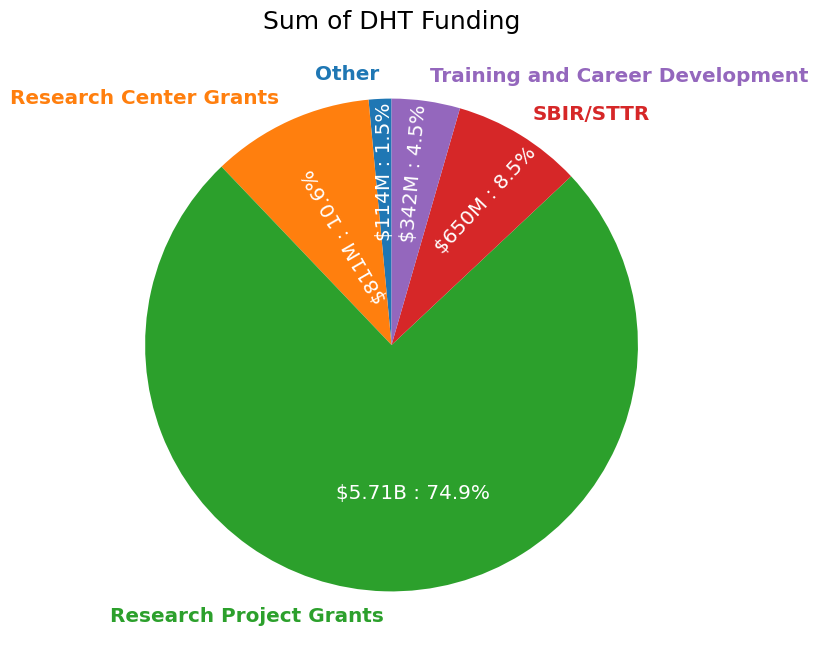

In [31]:
#Supp Fig 1a - NOTE, the journal advised not to use pie charts so this was replaced with a bar chart done via excel.
#pie chart for sum of funding by category
mHealthFundsCode=pd.pivot_table(df,index=["Admin IC"],columns=["codetype"],values="DHT$",aggfunc=np.sum).sum()
#mHealthFundsCode.plot.pie(ylabel='',title='Sum of DHT Funding',autopct='%.1f%%')

###side by side pie chart

#fix labels per 4/25/24 request:
pie_labels = list(mHealthFundsCode.index)
#pie_labels[ pie_labels.index('Research Projects') ] = 'Research Projects/\nResearch Center'

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
patches, texts, pcts = axs.pie(
    mHealthFundsCode, labels=pie_labels, autopct='%.1f%%',
    #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
from decimal import Decimal
for i, patch in enumerate(patches):
    print('processing: ', mHealthFundsCode[i], pie_labels[i])

    texts[i].set_color(patch.get_facecolor())
    #csum='$%.2E' % Decimal(mHealthFundsCode[i].round() ) #XXE8, E7 etc
    #csum= '$' + str(round(mHealthFundsCode[i]))
    if mHealthFundsCode[i] > 1E+09:
        print('processing special $B case: ', mHealthFundsCode[i], pie_labels[i])
        csum= '$' + str(round(mHealthFundsCode[i]/1E+09, 2))+ 'B' #XXE8, E7 etc
    else:
        csum= '$' + str(round(mHealthFundsCode[i].round()/1E+08*100))+ 'M' #XXE8, E7 etc
    print(i, pcts[i].get_text())
    cpct=pcts[i].get_text()
    if i==1:
        pcts[i].set_text('' + csum  + ' : ' + cpct + '         ')
    else:
        pcts[i].set_text('        ' + csum  + ' : ' + cpct)
#plt.setp(pcts, color='white',rotation='vertical')
plt.setp(pcts, color='white',rotation=37) #'37')
for ipct, tx in enumerate(pcts):
    rot = tx.get_rotation()
    print(ipct, tx, rot)
    if ipct==0:
        tx.set_rotation(90)
    if ipct==1:
        tx.set_rotation(120)
    if ipct==2:
        tx.set_rotation(0)
    if ipct==3:
        tx.set_rotation(47)
    if ipct==4:
        tx.set_rotation(85)
plt.setp(texts, fontweight=600)
axs.set_title('Sum of DHT Funding', fontsize=18)
#plt.tight_layout()
fig.figure.savefig(outpath + 'SuppFig1a_mHealthFunds_grantCts_pie1_funding_totalGrants.tiff', dpi=600) #

plt.show()

#plt.setp(pcts) #this lists all settable properties

C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\4040472187.py:5: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsRPG=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()


['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5']
['$0.0B', '$0.5B', '$1.0B', '$1.5B', '$2.0B', '$2.5B', '$3.0B', '$3.5B']


C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\4040472187.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels)
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\4040472187.py:19: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsRCG=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()


['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5']
['$0M', '$50M', '$100M', '$150M', '$200M', '$250M', '$300M', '$350M']


C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\4040472187.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels)


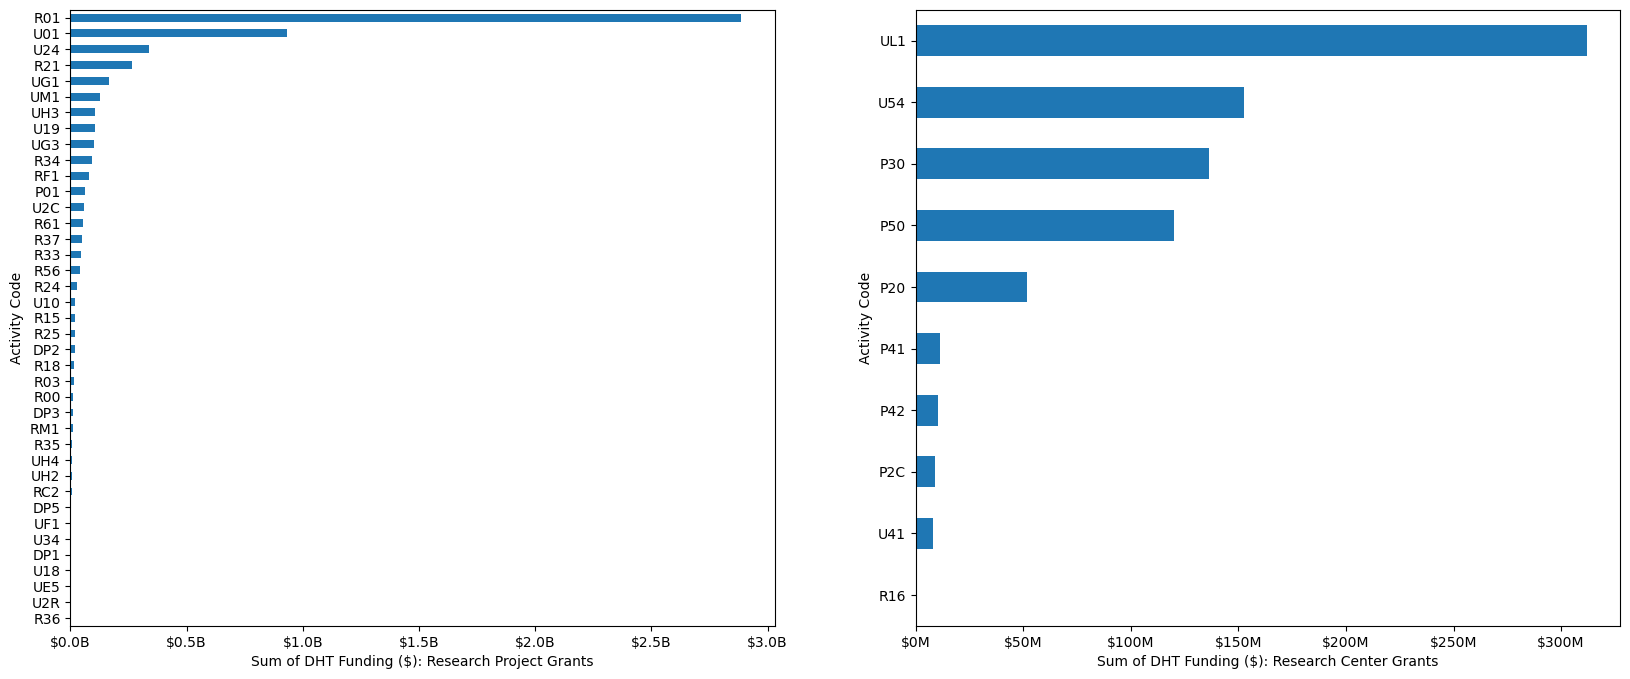

In [32]:
#Supplemental Figure 1b
#bar plot with IC x Infra/RPG grouping
fig, ax = plt.subplots(1,2,figsize=(20, 8))
df2=df[ df["codetype"]=='Research Project Grants' ]
mHealthFundsRPG=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()
plt.subplot(1, 2, 1)
mHealthFundsRPG.sort_values().plot.barh(xlabel='Sum of DHT Funding ($): Research Project Grants')#,autopct='%.1f%%',)
#change xtick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax[0].get_xticklabels()]
print(labels)
labels = ['$' + str((float(item)*1)) + 'B' for item in labels[:]] #1E8 = 1 * 10^8 = 100,000,000 
print(labels)
ax[0].set_xticklabels(labels)
mHealthFundsRPG.sort_values().to_csv(outpath + 'SuppFig1b_mHealthFundsbyActCode_RPGs.csv')


df2=df[ df["codetype"]=='Research Center Grants' ]
mHealthFundsRCG=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()
plt.subplot(1, 2, 2)
mHealthFundsRCG.sort_values().plot.barh(xlabel='Sum of DHT Funding ($): Research Center Grants')
#change xtick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax[1].get_xticklabels()]
print(labels)
labels = ['$' + str(round(float(item)*100)) + 'M' for item in labels[:]] #1E7 = 1 * 10^7 = 10,000,000
#labels = ['$' + str((float(item)*1)) + 'B' for item in labels[:]] #1E7 = 1 * 10^7 = 10,000,000

print(labels)
ax[1].set_xticklabels(labels)
mHealthFundsRCG.sort_values().to_csv(outpath + 'SuppFig1b_mHealthFundsbyActCode_ResCenters.csv')


fig.figure.savefig(outpath + 'SuppFig1b_mHealthFundsbyActCode_ProjAndCenter_totalGrants.tiff', dpi=600) #


In [33]:
#2 extra tables on funding per 
df2=df[ df["codetype"]=='Training and Career Development' ]
mHealthFundsTrain=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()
mHealthFundsTrain.sort_values().to_csv(outpath + 'SuppFig1b_mHealthFundsbyActCode_Training.csv')

df2=df[ df["codetype"]=='SBIR/STTR' ]
mHealthFundsSBIR=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()
mHealthFundsSBIR.sort_values().to_csv(outpath + 'SuppFig1b_mHealthFundsbyActCode_SBIR.csv')

df2=df[ df["codetype"]=='Other' ]
mHealthFundsOther=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()
mHealthFundsOther.sort_values().to_csv(outpath + 'SuppFig1b_mHealthFundsbyActCode_Other.csv')

C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\2764380164.py:3: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsTrain=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\2764380164.py:7: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsSBIR=pd.pivot_table(df2,columns=["Activity Code"],values="DHT$",aggfunc=np.sum).sum()
C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\2764380164.py:11: FutureWarning: The provided callable <function sum at 0x000001C6B4CB80E0> is currently using D

In [34]:
df2=df[ df["codetype"]=='Research Project Grants' ]
mHealthCountsRPG=pd.pivot_table(df2,columns=["Activity Code"],values="codetype",aggfunc='count') 
mHealthCountsRPG.to_csv(outpath+'SuppFig1b_mHealthCountsbyActCode_RPGs.csv')

df2=df[ df["codetype"]=='Research Center Grants' ]
mHealthCountsRCG=pd.pivot_table(df2,columns=["Activity Code"],values="codetype",aggfunc='count') 
mHealthCountsRCG.to_csv(outpath+'SuppFig1b_mHealthCountsbyActCode_ResCenters.csv')

df2=df[ df["codetype"]=='Training and Career Development' ]
mHealthCountsTrain=pd.pivot_table(df2,columns=["Activity Code"],values="codetype",aggfunc='count') 
mHealthCountsTrain.to_csv(outpath+'SuppFig1b_mHealthCountsbyActCode_Training.csv')

df2=df[ df["codetype"]=='SBIR/STTR' ]
mHealthCountsSBIR=pd.pivot_table(df2,columns=["Activity Code"],values="codetype",aggfunc='count') 
mHealthCountsSBIR.to_csv(outpath+'SuppFig1b_mHealthCountsbyActCode_SBIR.csv')

df2=df[ df["codetype"]=='Other' ]
mHealthCountsOther=pd.pivot_table(df2,columns=["Activity Code"],values="codetype",aggfunc='count') 
mHealthCountsOther.to_csv(outpath+'SuppFig1b_mHealthCountsbyActCode_Other.csv')

# Supplemental Figure 2. DHT according to DHT Category (pie chart)

## Supp. Fig. 2, Step a) Deduplicate Grants:

In [35]:
#sort by grant number, fy, appl id and type
dfi_st=dfi.loc[dfi['Appl Type Code'].isin([1, 2, 5])]
#df.loc[df['col1'].isin([value1, value2, value3, ...])]
dfi_st=dfi_st.sort_values(['Grant Number', 'Fiscal Year', 'Appl ID', 'Appl Type Code'])

dfi_st[['Grant Number', 'Fiscal Year', 'Appl ID', 'Appl Type Code']]

Grant Number  Fiscal Year   Appl ID  Appl Type Code
12106  C06OD036020         2023  10795328               1
12151  D43TW006589         2015   8837937               5
12157  D43TW006589         2016   9023608               5
12156  D43TW006589         2017   9198804               5
12144  D43TW006589         2018   9413232               5
...            ...          ...       ...             ...
11461  UM1DA049406         2019   9836991               1
11479  UM1DA049406         2020   9917748               5
11484  UM1DA049406         2021  10142414               5
11475  UM1DA049406         2022  10388180               5
7643   UM1TR004360         2023  10617079               1

[12130 rows x 4 columns]

In [36]:
grant_nums=dfi_st['Grant Number'].unique()
dfi_dedup = pd.DataFrame(index=range(len(grant_nums)),columns=dfi_st.columns) 

#ignore warnings:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

i=0
for grant in grant_nums:
    cgrants=dfi_st[dfi_st['Grant Number']==grant]
    dfi_dedup.iloc[i] = cgrants.iloc[0]
    i+=1

In [37]:
#the following block is needed only if you plan on assigning manual verification to co-authors:
#add column of random numbers and assign curators
import random
dfi_dedup['rand_ix'] = random.sample(range(len(dfi_dedup)), len(dfi_dedup))
dfi_dedup=dfi_dedup.set_index('rand_ix')

In [38]:
dfi_dedup.to_csv(outpath + 'dedup_' + inputname + '.csv')

In [39]:
dfi_dedup[['Grant Number', 'Fiscal Year', 'Appl ID', 'Appl Type Code']]

Grant Number Fiscal Year   Appl ID Appl Type Code
rand_ix                                                  
3501     C06OD036020        2023  10795328              1
1768     D43TW006589        2015   8837937              5
1163     D43TW009374        2015   8913288              5
926      D43TW009675        2020  10055152              2
1330     D43TW010060        2020   9999877              2
...              ...         ...       ...            ...
4282     UM1AI068617        2021   9986472              2
1510     UM1AR063381        2015   8903698              5
3435     UM1CA182913        2015   8928572              5
4307     UM1DA049406        2019   9836991              1
4249     UM1TR004360        2023  10617079              1

[5158 rows x 4 columns]

## Supplemental Table 2 (needed for Supp. Fig. 2): ### 	Search Terms per Category Name


In [40]:
#append column to db that indicates count of terms (putting some into same category)
terms=[
    ["decentralized trial", "remote trial", "virtual trial"],
    ['digital health' , 'digital health technology' , 'digital health technologies'],
    ['mobile app' , 'mobile application' , 'mobile health' , 'mobile health technology', 'mobile health technologies' , 'mhealth'],
    ['smart connected health' , 'remote patient monitoring' , 'connected home health'],
    ['wearable device' , 'wearable'],
    ['remote healthcare delivery' , 'virtual care' , 'digital patient engagement' , 'telehealth' , 'telemedicine']
]
categories=['Trials','Digital Health','Mobile', 'Connected', 'Wearables' , 'Telehealth']

In [41]:
#counts of categories
ngrants=dfi_dedup.shape[0]
for ix,ccat in enumerate(categories):
    catcounts=[0]*ngrants #placeholder for counts per category
    for term in terms[ix]:
        catcounts=catcounts+dfi_dedup.Title.fillna('').apply(str.lower).str.count(term)+dfi_dedup.Abstract.fillna('').apply(str.lower).str.count(term)+dfi_dedup['Specific Aims'].fillna('').apply(str.lower).str.count(term)
    dfi_dedup['cts_' + ccat]=catcounts 
    
dfi_dedup.to_csv(outpath + 'iSearchTermCounts.csv')


In [42]:
dfi_mask=dfi_dedup.iloc[: , -6:]>0
dfi_mask.columns=dfi_mask.columns.str.replace('cts_','')
dfi_mask=dfi_mask.add_prefix('mask_')
dfi_mask

mask_Trials  mask_Digital Health  mask_Mobile  mask_Connected  \
rand_ix                                                                  
3501           False                False        False           False   
1768           False                False         True           False   
1163           False                False        False           False   
926            False                False         True           False   
1330           False                False         True           False   
...              ...                  ...          ...             ...   
4282           False                False         True           False   
1510           False                False        False           False   
3435           False                False        False           False   
4307           False                False        False           False   
4249           False                False        False           False   

         mask_Wearables  mask_Telehealth  
rand_ix                                   
3501              False             True  
1768              False            False  
1163              False             True  
926               False            False  
1330              False            False  
...                 ...              ...  
4282              False            False  
1510              False            False  
3435              False            False  
4307              False             True  
4249              False             True  

[5158 rows x 6 columns]

In [43]:
grantCts=dfi_mask.sum()
grantPct=round((grantCts/ngrants)*100,1)
grantPct.index=['Trials', 'Digital Health     ','Mobile','Connected','Wearables','Telehealth']

## Plot Supplemental Figure 2:

C:\Users\radmantc\AppData\Local\Temp\ipykernel_34632\3651837039.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  csum=str(grantCts[i])


        15 : 0.3%
        374 : 8.2%
        1951 : 42.4%
        47 : 1.0%
        1283 : 27.9%
        930 : 20.2%


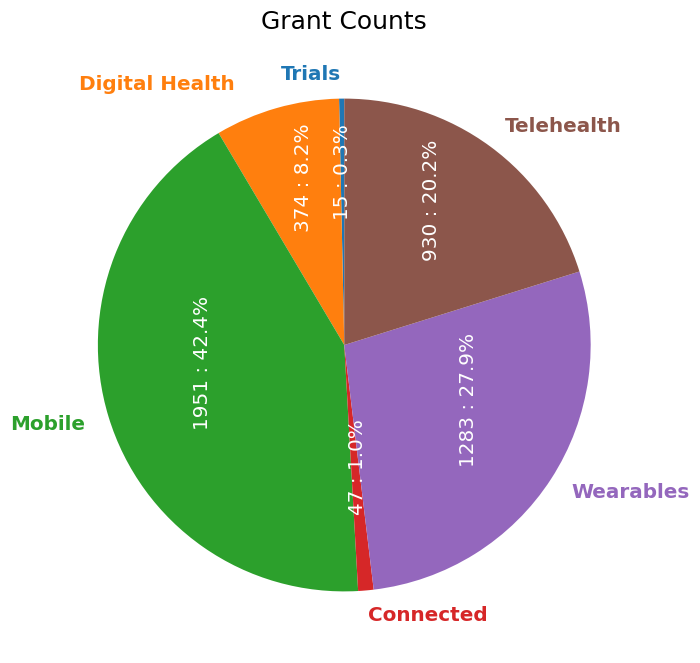

In [44]:
#pie chart of grant categories (from data derived at top of notebook)
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
patches, texts, pcts = axs.pie(
    grantPct, labels=grantPct.index, autopct='%.1f%%',
    #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
from decimal import Decimal
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    csum=str(grantCts[i])
    cpct=pcts[i].get_text()
    pcts[i].set_text('        ' + csum  + ' : ' + cpct)
    print(pcts[i].get_text())
plt.setp(pcts, color='white',rotation='vertical')
plt.setp(texts, fontweight=600)
axs.set_title('Grant Counts', fontsize=18)
#plt.tight_layout()

fig.figure.savefig(outpath + 'SuppFig2_mHealthFunds_grantCts_pie2_cats.tiff', dpi=600) #

# Supplemental Figure 4.  Most frequent words by DHT Area of Interest in the NIH DHT portfolio from 2015 – 2023

## Supp. Fig. 4, step a) read in and process dataframe of manual curations downloaded from iSearch curations system and individual curations combined into final votes (aka "derived")

In [45]:
df_cur = pd.read_csv(datapath + 'allCurationDerivations - Redacted.csv')

In [46]:
#combine text columns to use as input to wordclouds: 
cols = [ "Title", "Abstract"] #if not redacted dataframe, can also add: (as done in publication) ....., "Specific Aims"]
df_cur['combined'] = df_cur[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

## Supp. Fig. 4, step b) create wordclouds for each curation category and take top words from each individual wordcloud

In [47]:
weights=pd.DataFrame(columns =['rank', 'isRemote' + '_weight', 'isDataGath'+ '_weight', 'isIntervent'+ '_weight', 'isClin'+ '_weight', 'isRnD'+ '_weight', 'isWear'+ '_weight','isTele'+ '_weight', 'isMobile'+ '_weight', 'isHome'+ '_weight',
                               'isRemote' + '_word', 'isDataGath'+ '_word', 'isIntervent'+ '_word', 'isClin'+ '_word', 'isRnD'+ '_word', 'isWear'+ '_word', 'isTele'+ '_word', 'isMobile'+ '_word', 'isHome'+ '_word'])
nwords=200
weights['rank'] = np.arange(nwords)+1
weights

rank isRemote_weight isDataGath_weight isIntervent_weight isClin_weight  \
0       1             NaN               NaN                NaN           NaN   
1       2             NaN               NaN                NaN           NaN   
2       3             NaN               NaN                NaN           NaN   
3       4             NaN               NaN                NaN           NaN   
4       5             NaN               NaN                NaN           NaN   
..    ...             ...               ...                ...           ...   
195   196             NaN               NaN                NaN           NaN   
196   197             NaN               NaN                NaN           NaN   
197   198             NaN               NaN                NaN           NaN   
198   199             NaN               NaN                NaN           NaN   
199   200             NaN               NaN                NaN           NaN   

    isRnD_weight isWear_weight isTele_weight isMobile_weight isHome_weight  \
0            NaN           NaN           NaN             NaN           NaN   
1            NaN           NaN           NaN             NaN           NaN   
2            NaN           NaN           NaN             NaN           NaN   
3            NaN           NaN           NaN             NaN           NaN   
4            NaN           NaN           NaN             NaN           NaN   
..           ...           ...           ...             ...           ...   
195          NaN           NaN           NaN             NaN           NaN   
196          NaN           NaN           NaN             NaN           NaN   
197          NaN           NaN           NaN             NaN           NaN   
198          NaN           NaN           NaN             NaN           NaN   
199          NaN           NaN           NaN             NaN           NaN   

    isRemote_word isDataGath_word isIntervent_word isClin_word isRnD_word  \
0             NaN             NaN              NaN         NaN        NaN   
1             NaN             NaN              NaN         NaN        NaN   
2             NaN             NaN              NaN         NaN        NaN   
3             NaN             NaN              NaN         NaN        NaN   
4             NaN             NaN              NaN         NaN        NaN   
..            ...             ...              ...         ...        ...   
195           NaN             NaN              NaN         NaN        NaN   
196           NaN             NaN              NaN         NaN        NaN   
197           NaN             NaN              NaN         NaN        NaN   
198           NaN             NaN              NaN         NaN        NaN   
199           NaN             NaN              NaN         NaN        NaN   

    isWear_word isTele_word isMobile_word isHome_word  
0           NaN         NaN           NaN         NaN  
1           NaN         NaN           NaN         NaN  
2           NaN         NaN           NaN         NaN  
3           NaN         NaN           NaN         NaN  
4           NaN         NaN           NaN         NaN  
..          ...         ...           ...         ...  
195         NaN         NaN           NaN         NaN  
196         NaN         NaN           NaN         NaN  
197         NaN         NaN           NaN         NaN  
198         NaN         NaN           NaN         NaN  
199         NaN         NaN           NaN         NaN  

[200 rows x 19 columns]

In [48]:
col_list = ['isRemote', 'isDataGath',
 'isIntervent',
 'isClin',
 'isRnD',
 'isWear',
 'isTele',
 'isMobile',
 'isHome']

isRemote


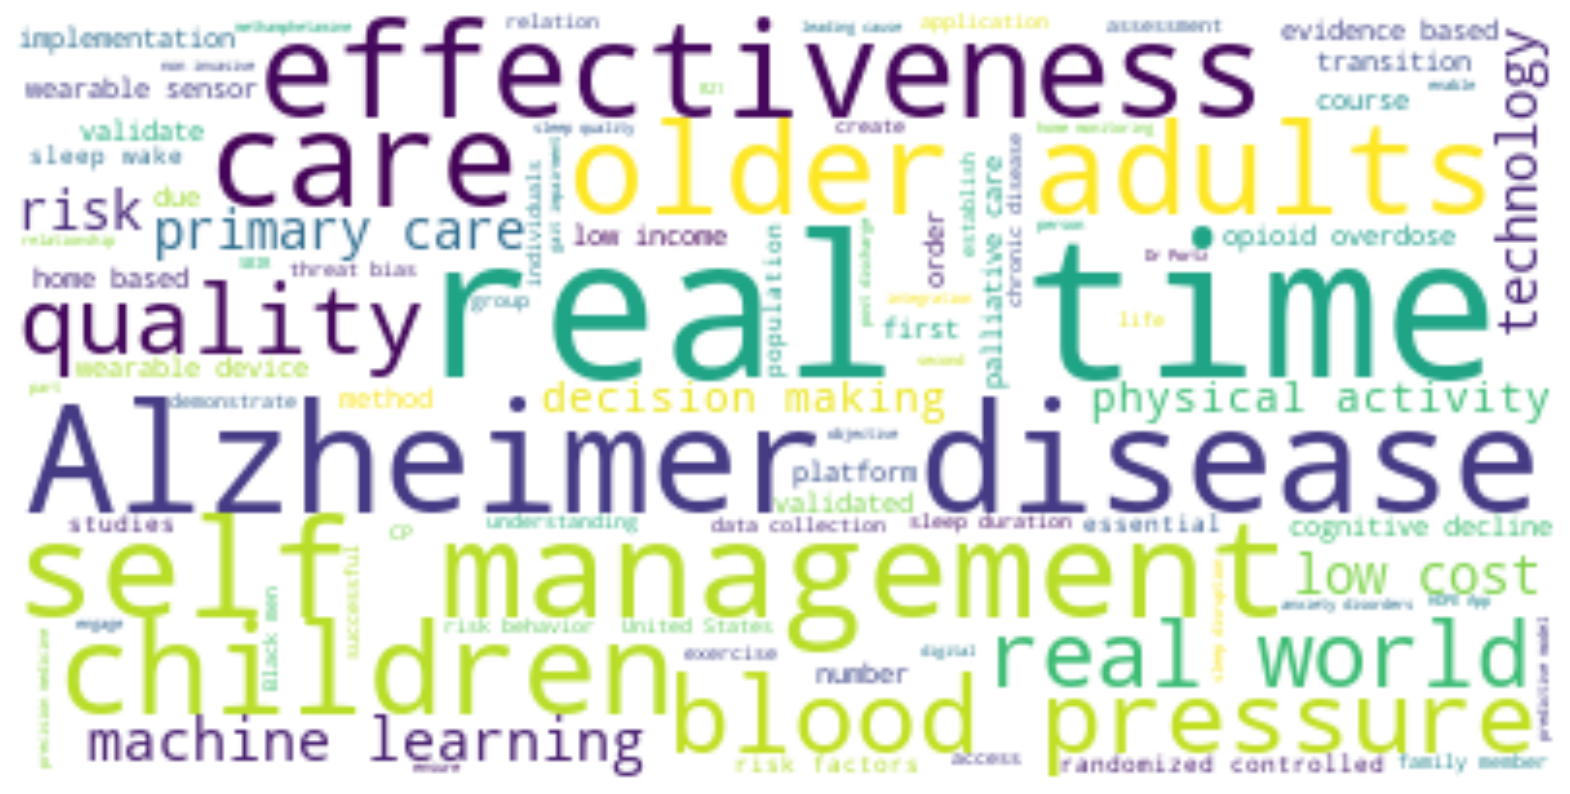

isDataGath


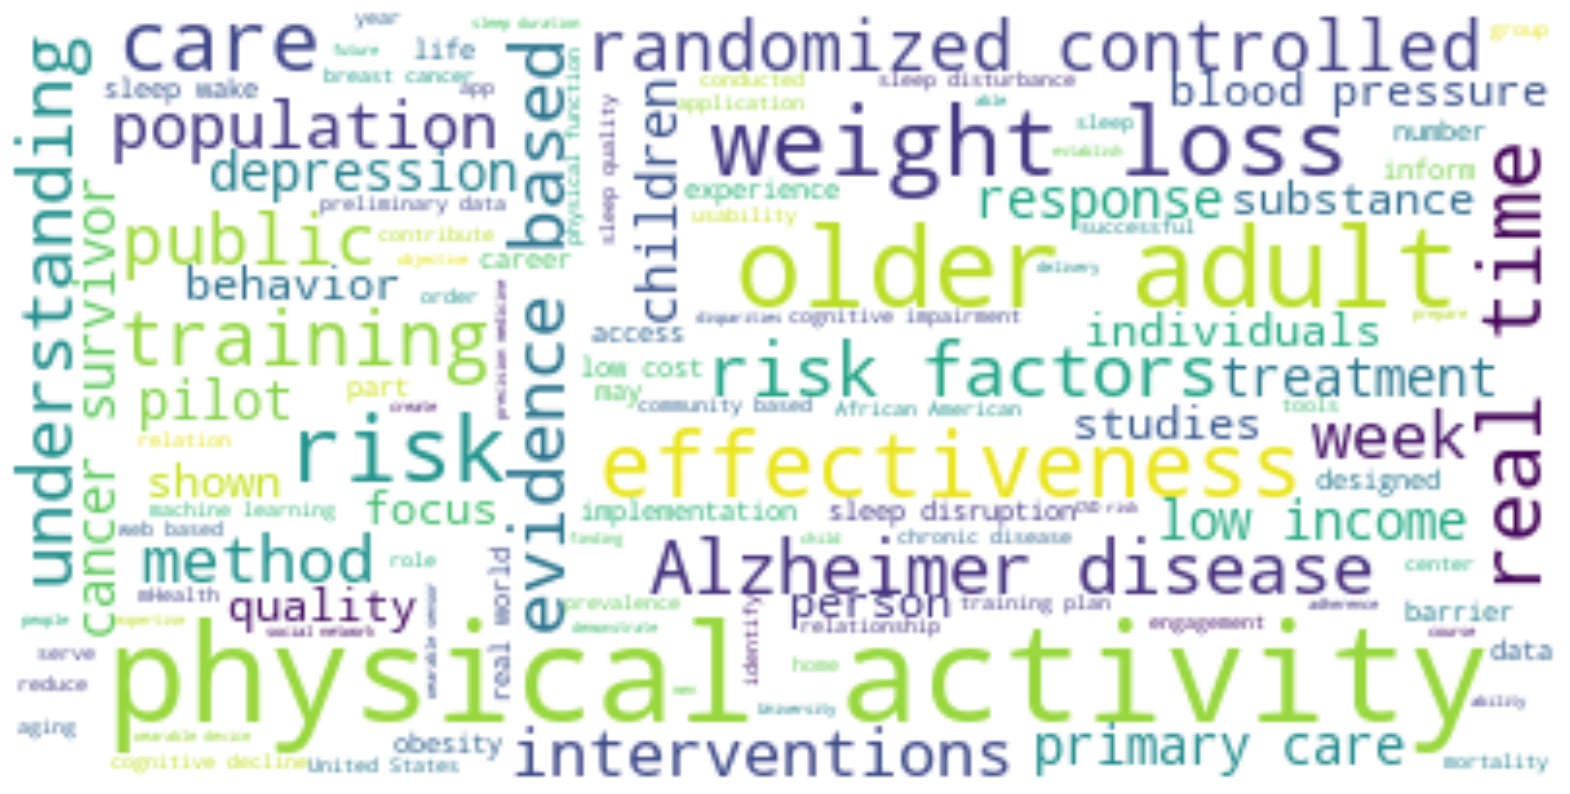

isIntervent


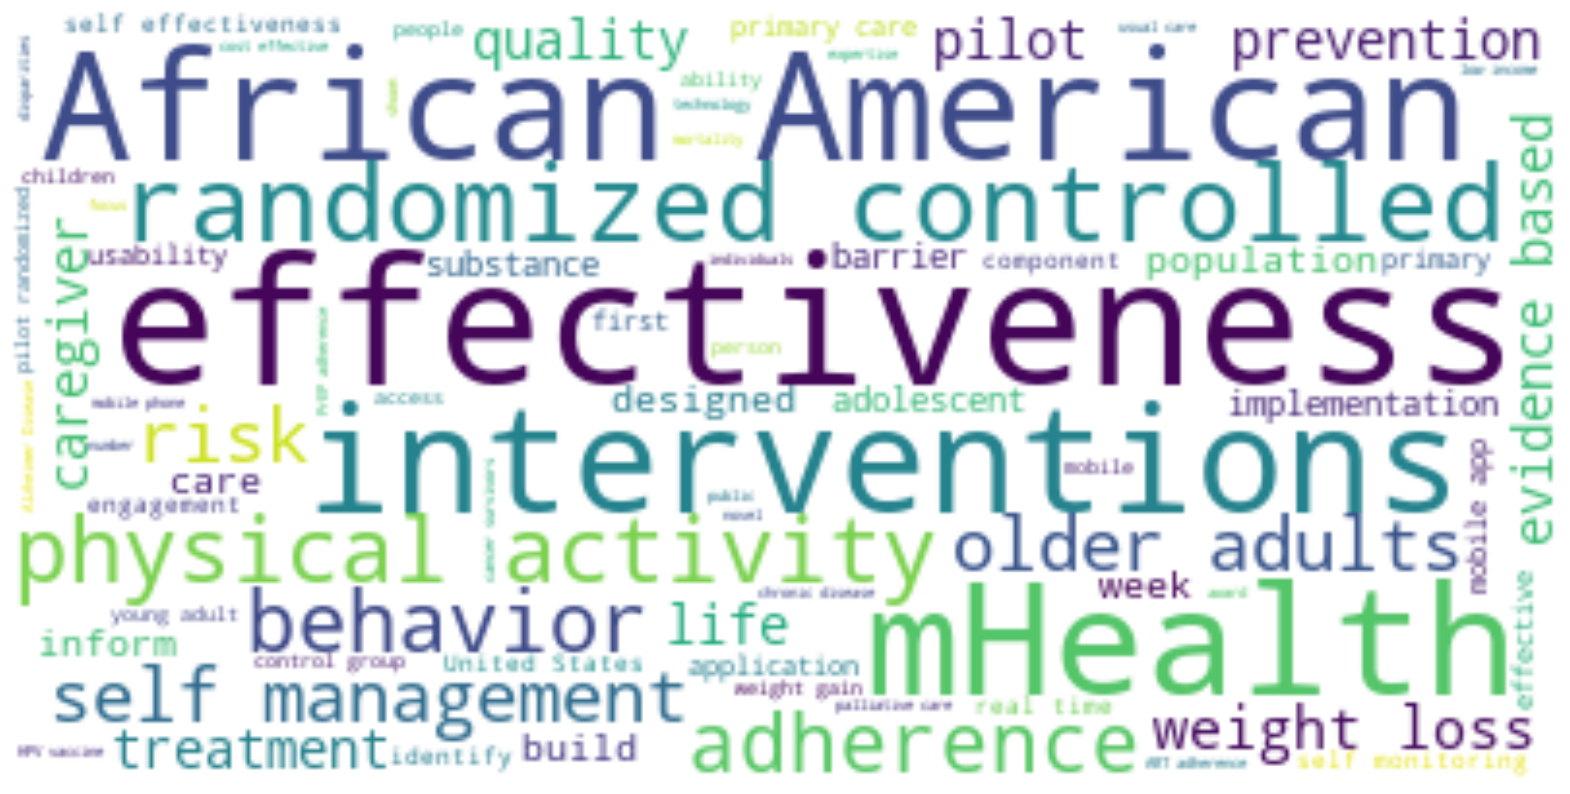

isClin


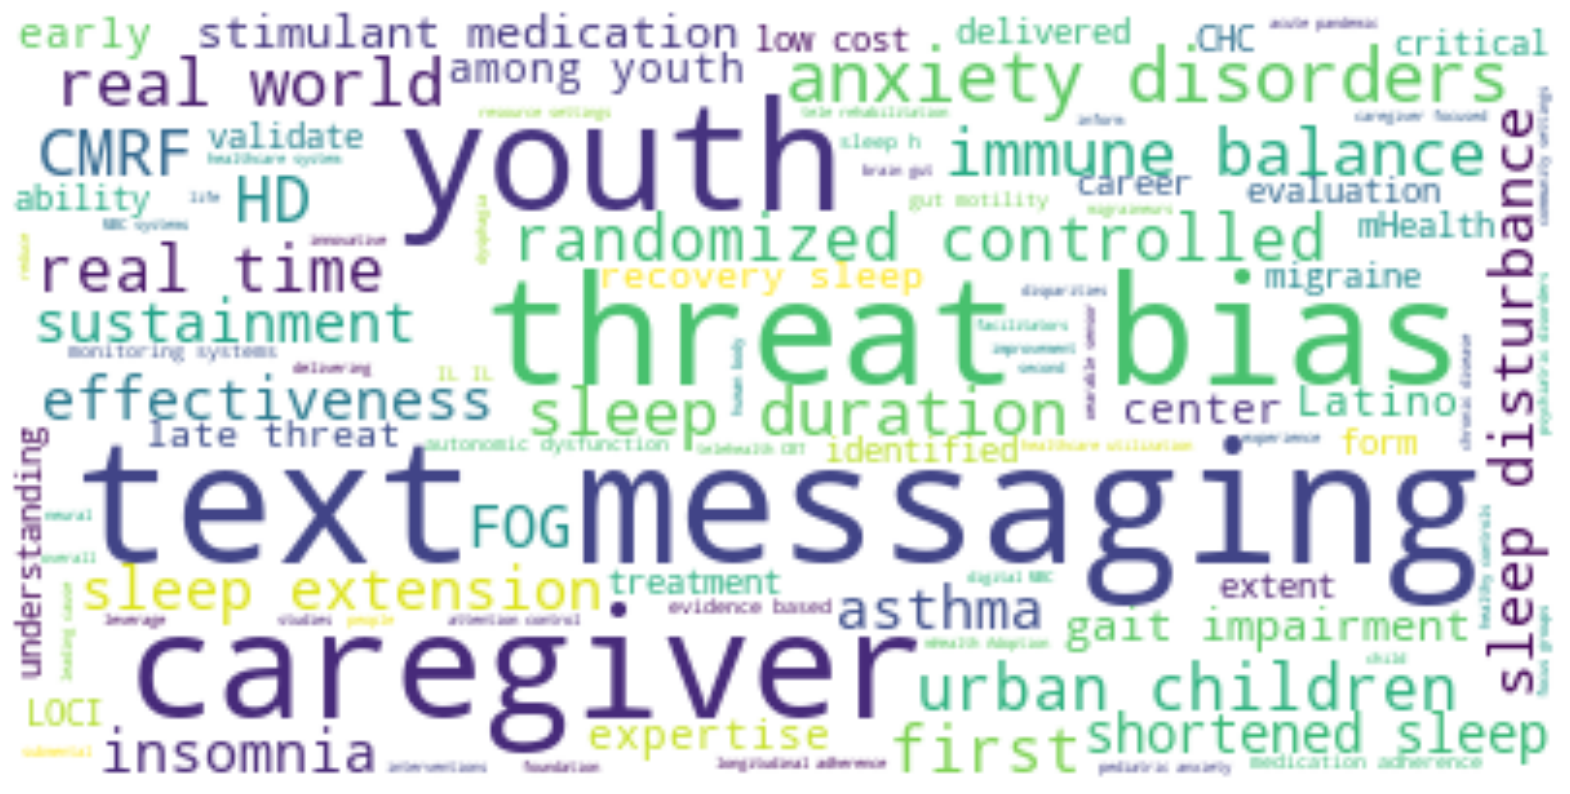

isRnD


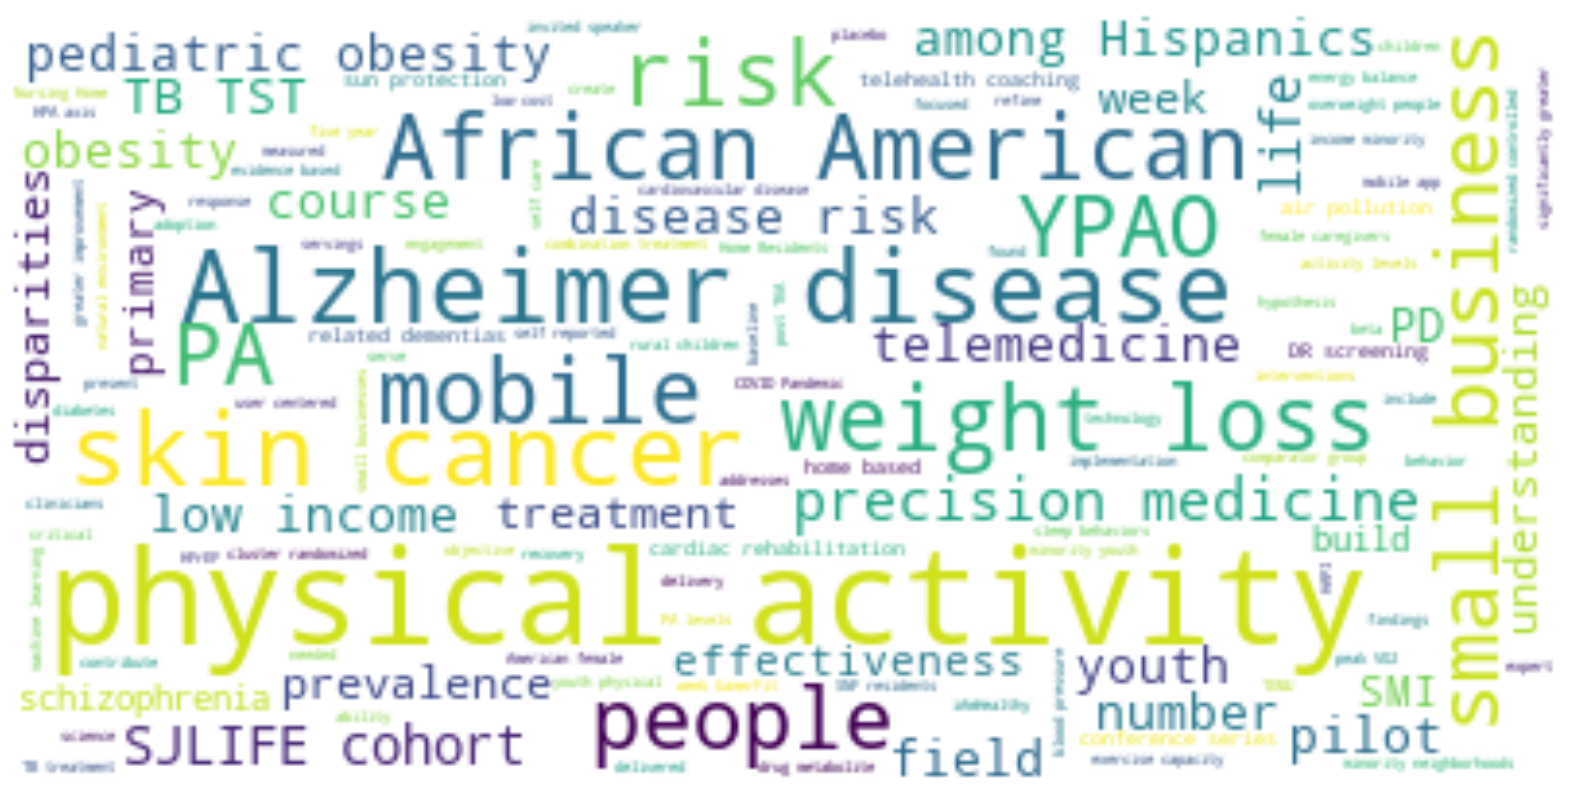

isWear


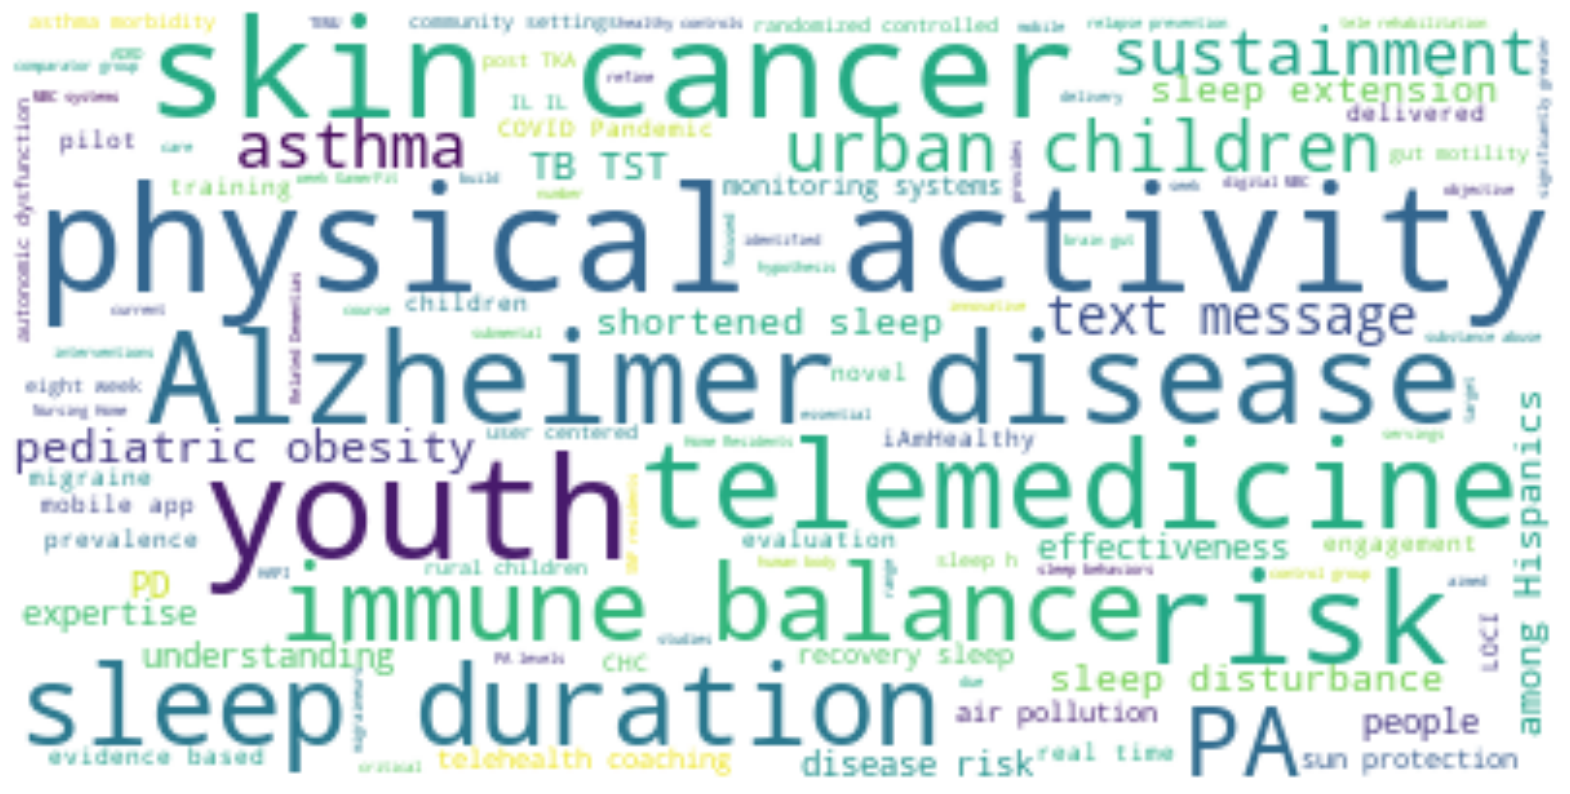

isTele


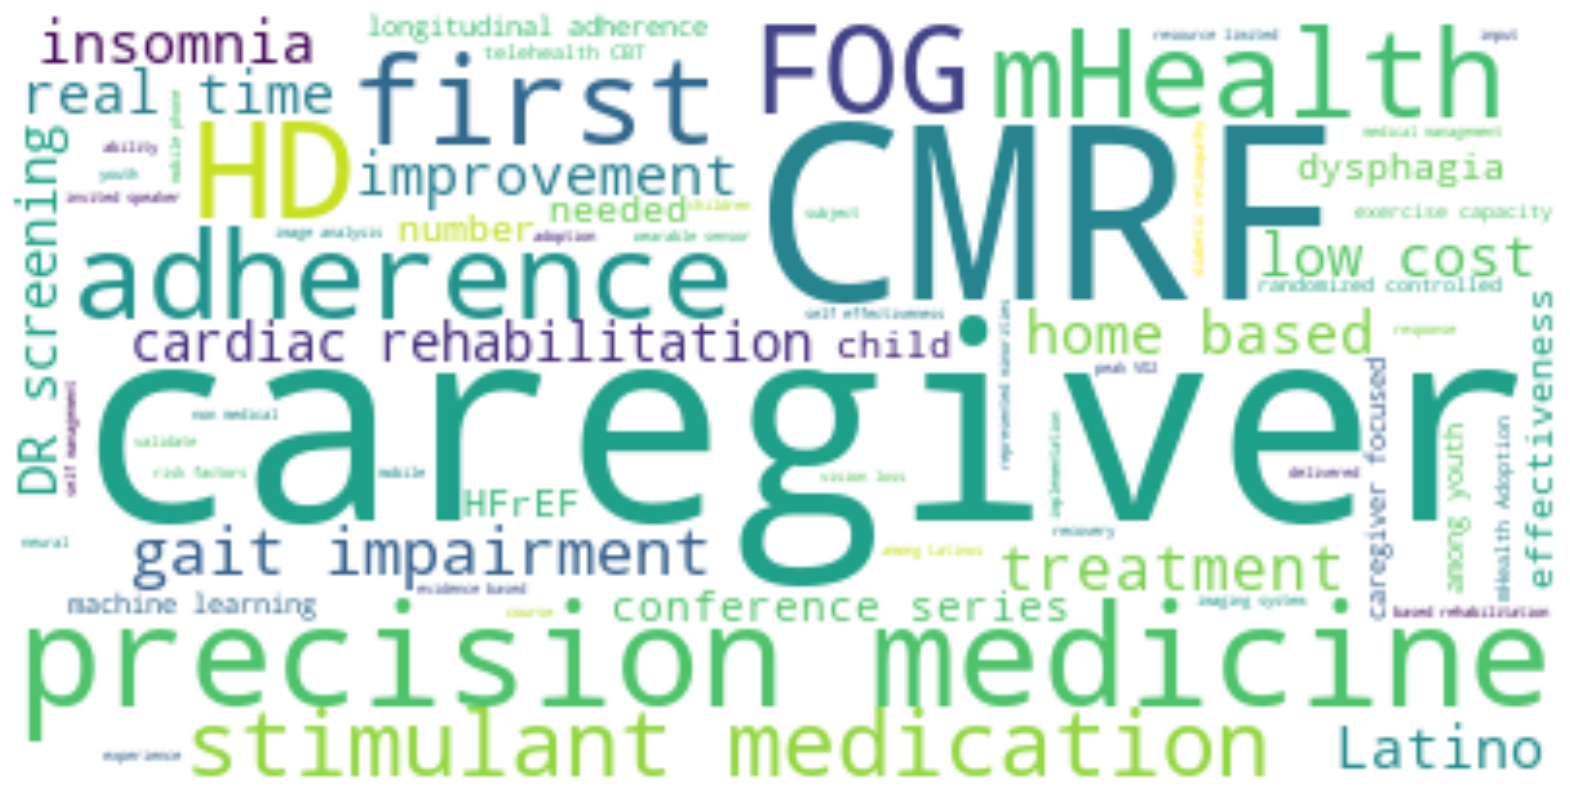

isMobile


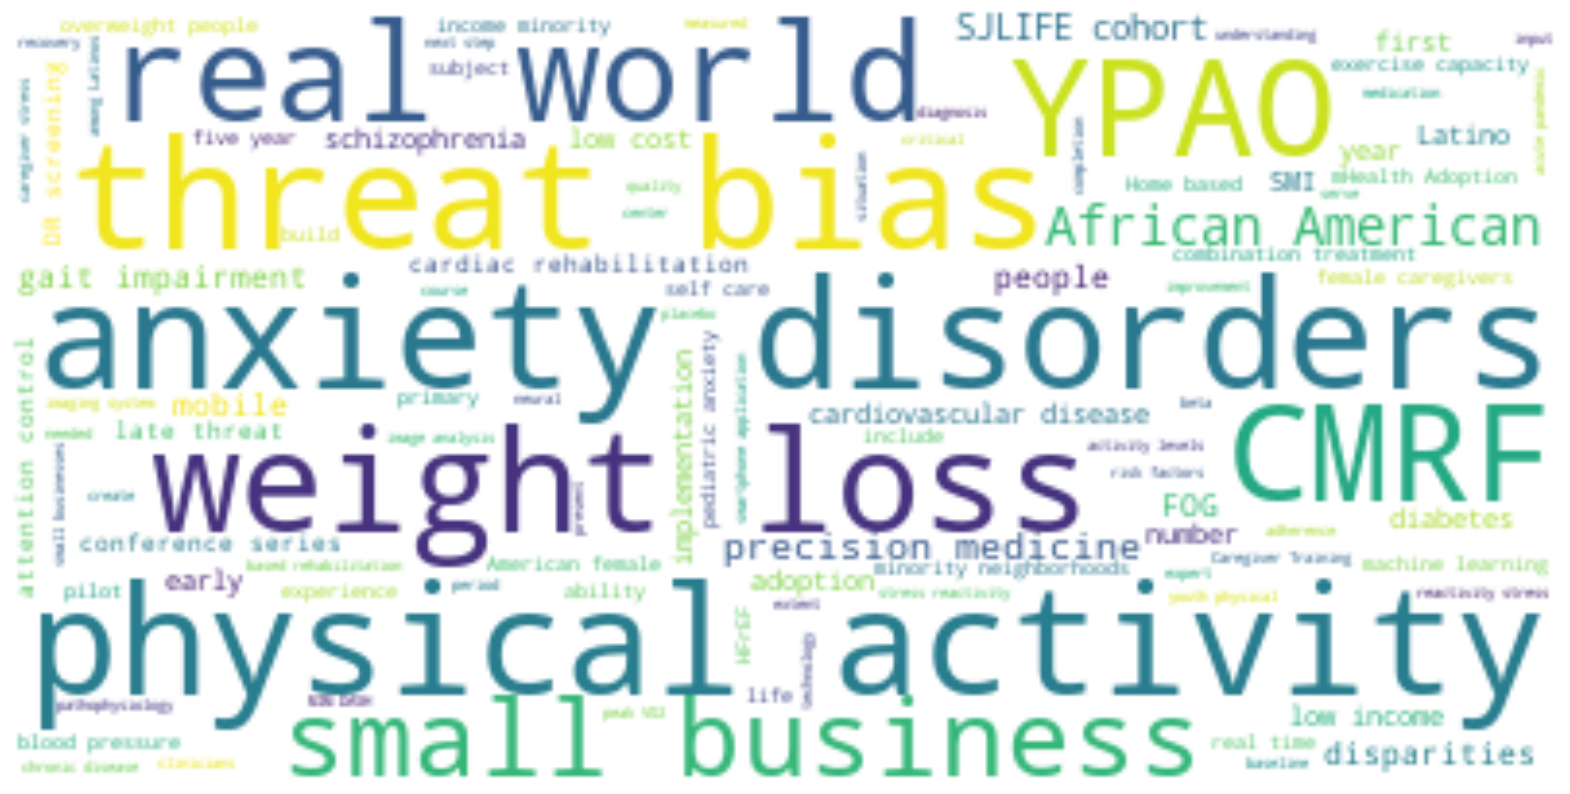

isHome


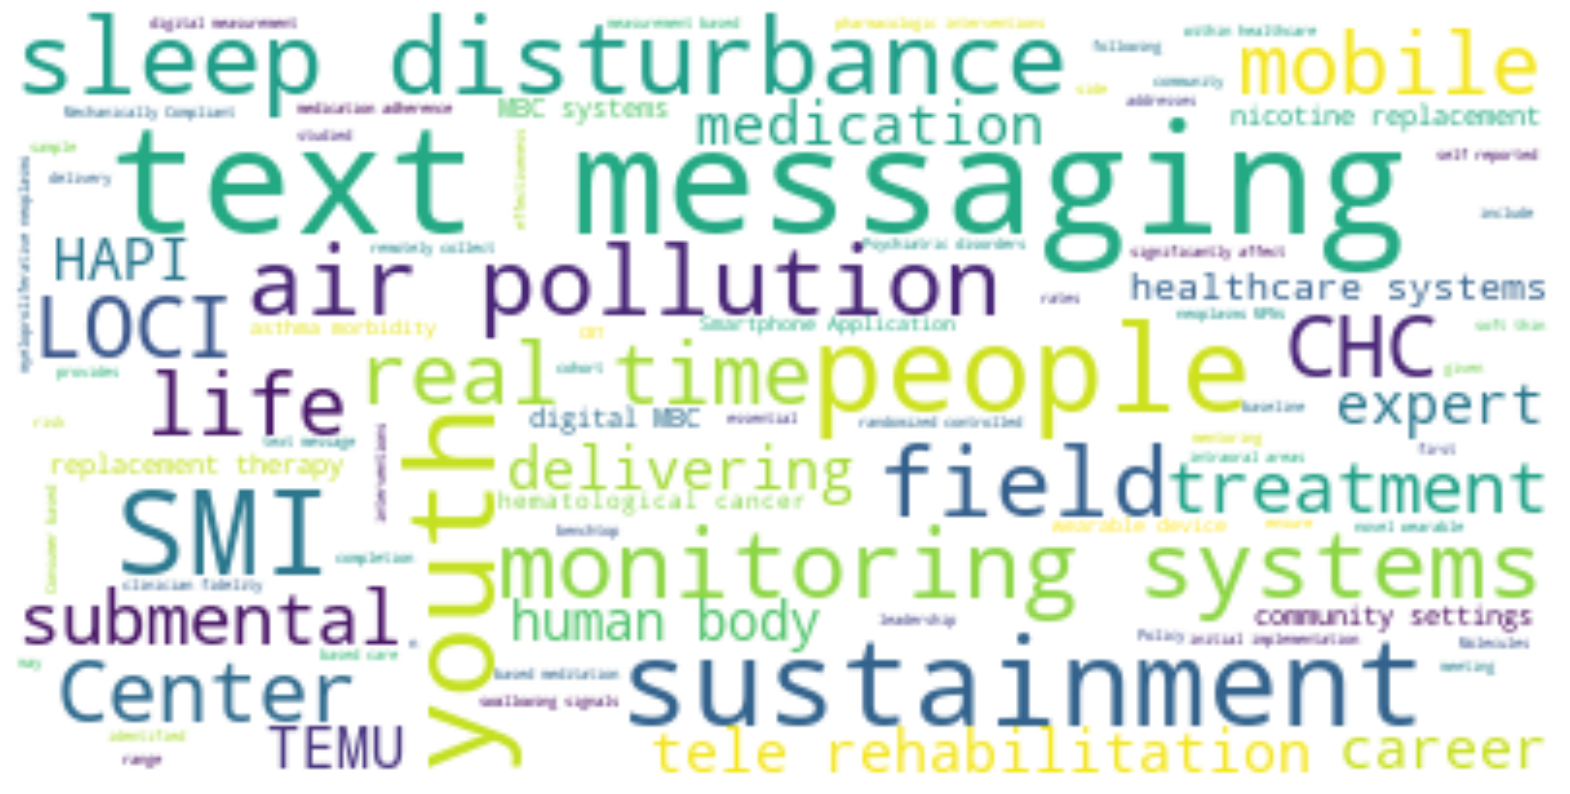

In [49]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


stopwords = set(STOPWORDS)
newstopwords = ['e', 'g', 'associated', 'HIV', 'testing', 'well', 'used' ,'Specific', 'Aim','Phase','II','used',
                'develop','effect','mental','health','clinical','trial','alcohol','use','study','will','patient','aims',
                'determine','muscle', 'strengthening', 'intervention', 'test',  'proposed', 'need', 'evaluate', 'provide',
                 'impact', 'propose', 'feasibility', 'hypothesize','patients', 'improve', 'outcome', 'change', 'month',
                 'compared', 'conduct', 'aerobic', 'MVPA', 'assess', 'address', 'result', 'outcomes', 'one','project', 'individual',
                'effects', 'U', 'S', 'months', 'changes', 'research', 'lack', 'goal', 'association', 'participant','team',
                'increase', 'likely', 'assessed', 'tested', 'participants', 'Malaysia', 'randomized controlled', 'follow',
                'benefit', 'examine', 'acceptability', 'measure','Cerebral', 'Palsy', 'long', 'term', 'development',
                'White', 'women','factor','high','results','tool','program','work', 'addition','potential', 'using',
               'design','proposal', 'smoking', 'cessation', 'lead','developed','support','trials']
stopwords.update(newstopwords)


for ccol in col_list:
    print(ccol)
    ctext = df_cur[df_cur[ccol]==True].combined
    #print(ctext)
    if all(ctext.isna()): continue
    try:
        text = " ".join(ctext) #combine rows into one big text
    except:
        continue
        
    text = text.replace('efficacy','effectiveness')

     # Generate a word cloud image
    #wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocation_threshold = 3).generate(text) #threshold low for bigrams, default = 30: https://stackoverflow.com/questions/49537474/wordcloud-of-bigram-using-python
    # Display the generated image:
    # the matplotlib way:
    plt.subplots(figsize=(20, 16))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(outpath + 'wordcloud_' + ccol + '.png', dpi=600)
    plt.show()
    
    #get wordcloud quantification and create table of top 25 overall words
    i=0
    for key in wordcloud.words_:
        #if i==25: break
        #print(i, key, "->", wordcloud.words_[key])
        weights[ccol+'_word'][i] = key
        weights[ccol+'_weight'][i] = wordcloud.words_[key]
        i +=1
    

## Supp. Fig. 4, step c) Combine wordcloud results and plot 

In [50]:
#loop through each word and columntype and sum like words into single master list.
#final table will have words down 1st column and each row per word will have the weight for each column for that word
topwords = pd.DataFrame(columns =['word', 'sum_weight'])

#loop through all the words and add them to topwords
for iword in range(nwords):
    for ccol in col_list:
        #print(iword, ccol, weights[ccol + '_word'][iword])
        cword = weights[ccol+'_word'][iword]
        if cword!=cword: continue
        cweight = weights[ccol+'_weight'][iword]
        word_ix = topwords.word == cword
        #print(not any(word_ix))
        if not any(word_ix): #cword not in topwords
            topwords.loc[len(topwords.index)] = [cword, cweight]
        else: #word found
            #print('word_found: ', topwords[word_ix])
            topwords['sum_weight'][word_ix] = topwords[word_ix].sum_weight + cweight 
            #print('word_found2: ', topwords[word_ix])
        
        #print('topwords = \n', topwords.word)
        #print('------------')
#nwords
#col_list
#

In [51]:
#get n=20 words and create output table with each columns weight for that word
#plot can be changed by modifying "n" below:
n=20
topN = topwords.sort_values(by='sum_weight',ascending=False).reset_index()[0:n]
#top25['applications']=0.0

for ccol in col_list:
    print('ccol = ', ccol)
    topN[ccol] = 0.0
    for cword in topN.word:
        print(cword)
        word_ix = weights[ccol+'_word'] == cword
        if not any(word_ix): #cword not in topwords
            topN[ccol][topN.word == cword] = 0
        else: #word found
            cweight = weights[ccol+'_weight'][word_ix]
            cweight = float(cweight)
            t25_ix = topN.word == cword
            t25_ix = [i for i, x in enumerate(t25_ix) if x]
            #top25[ccol][top25.word == cword] = cweight
            topN.loc[t25_ix,ccol] = cweight
            print('post = ', topN[ccol][topN.word == cword])
        
topN = topN.drop(['index'], axis=1)


ccol =  isRemote
physical activity
post =  0    0.363636
Name: isRemote, dtype: float64
effectiveness
post =  1    0.568182
Name: isRemote, dtype: float64
real time
post =  2    1.0
Name: isRemote, dtype: float64
youth
risk
post =  4    0.386364
Name: isRemote, dtype: float64
randomized controlled
post =  5    0.272727
Name: isRemote, dtype: float64
first
post =  6    0.272727
Name: isRemote, dtype: float64
people
real world
post =  8    0.454545
Name: isRemote, dtype: float64
mobile
Alzheimer disease
post =  10    0.704545
Name: isRemote, dtype: float64
precision medicine
post =  11    0.204545
Name: isRemote, dtype: float64
text messaging
weight loss
low cost
post =  14    0.363636
Name: isRemote, dtype: float64
life
post =  15    0.227273
Name: isRemote, dtype: float64
treatment
post =  16    0.136364
Name: isRemote, dtype: float64
number
post =  17    0.295455
Name: isRemote, dtype: float64
CMRF
African American
ccol =  isDataGath
physical activity
post =  0    1.0
Name: isDataGath

In [52]:
list(topN.word)

['physical activity',
 'effectiveness',
 'real time',
 'youth',
 'risk',
 'randomized controlled',
 'first',
 'people',
 'real world',
 'mobile',
 'Alzheimer disease',
 'precision medicine',
 'text messaging',
 'weight loss',
 'low cost',
 'life',
 'treatment',
 'number',
 'CMRF',
 'African American']

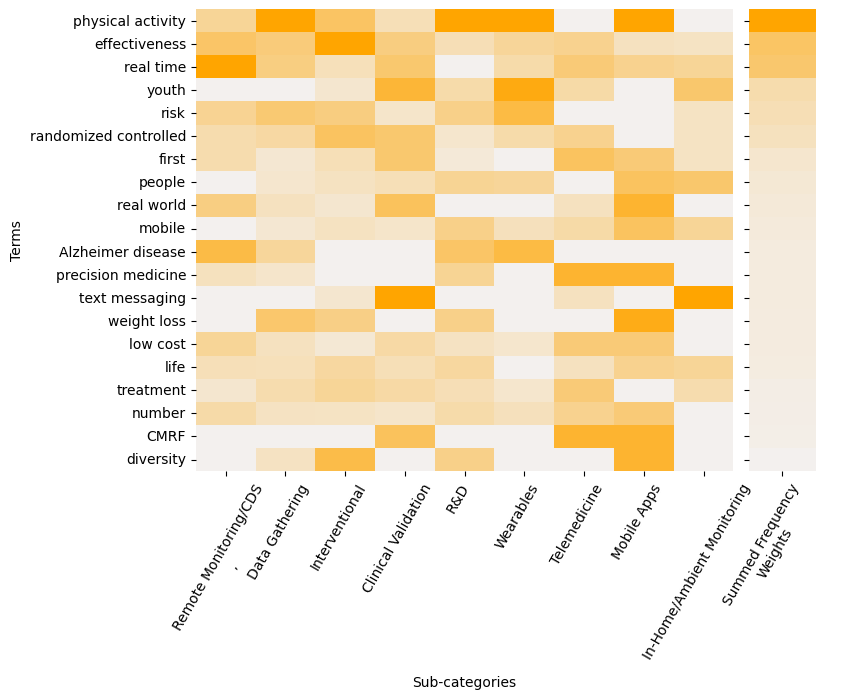

In [53]:
import seaborn as sns

#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
fig, axes = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [8, 1]}, figsize=(8,6))


topFreqs = topN.set_index('word').drop('sum_weight', axis=1)
topFreqs = topFreqs.rename(index={'African American': 'diversity', 'older adult':'elderly','homeless adults':'homeless'})
#                                     'site':'study site','community':'community engagement','participant':'participant engagement',
#                                     'implementation':'dissemination'})
labels = ['Remote Monitoring/CDS\n,','Data Gathering\n','Interventional\n','Clinical Validation\n', 'R&D\n','Wearables\n', 'Telemedicine\n' ,'Mobile Apps\n','In-Home/Ambient Monitoring\n' ]
           #isRemote 	isDataGath 	isIntervent 	isClin 	isRnD 	isWear 	isTele 	isMobile 	isHome
cmap = sns.light_palette("orange", as_cmap=True) # "#79C" #4f637f #5c7aa6
#annot=True for numbers on map
g = sns.heatmap(topFreqs, cmap=cmap,annot=False, xticklabels=labels, cbar=False, ax=axes[0]) #, cbar_kws={"shrink": .65}, square=True
g.set_xticklabels(
    labels=labels, rotation=60)
g.set(ylabel='Terms')
g.set(xlabel='Sub-categories')

sumWords = topN.set_index('word').drop(col_list, axis=1) #['applications', 'community', 'resources', 'workforce', 'collab', 'adherence', 'data', 'privacy'], axis=1)
g = sns.heatmap(sumWords, cmap=cmap,annot=False, xticklabels=['Summed Frequency\nWeights'], cbar=False, ax=axes[1]) #, cbar_kws={"shrink": .65}, square=True
g.set(yticklabels=[])
g.set(ylabel=None)
g.set_xticklabels(labels=['Summed Frequency\nWeights\n\n'], rotation=60)

fig.subplots_adjust(wspace=.05, hspace=0)
plt.show()

fig.figure.savefig(outpath + 'SuppFig4_TopWordFreqs_Grid.tiff', dpi=600,bbox_inches='tight') #